# Week 3: Census Data Explanation

### By Nataly Rios

HELLO! For this week's assignment, we will be exploring Census Data. Lauren and I are interested in exploring the Household Pulse Data collected by the Census for our final project. This database, with fewer response rates, compared to the actual census data collection. However, it has information related to the impacts of COVID-19 on US households. To explore just how representative that data is of the actual population. Today, I will look at race data at the state level, comparing data from the 2019 ACS 1-year estimate, downloaded from Census Reported, and   Household Pulse Survey December 9– December 21 data from downloaded directly from the Census. I have uploaded both of the databases to my jupyter hub.

## ACS Race Data Set Up

First, I am going to bring in the libraries so I can start looking at the data. 

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import numpy as np

import dateutil

Now I have set up pandas, geopanda, contextile, and matplotlib.

I am now going to bring the ACS data in. 

In [2]:
race_acs = gpd.read_file('/home/jovyan/206a assigment/Week 3 - Group Census Data Analysis/2019_ACS/acs2019_1yr_B03002_04000US46.geojson')

Now that I brought the data in, I want to learn a little bit about what it looks like so I'll run a .info command.

In [3]:
race_acs.info

<bound method DataFrame.info of         geoid                  name    B03002001  B03002001, Error  \
0     01000US         United States  328239523.0               0.0   
1   04000US01               Alabama    4903185.0               0.0   
2   04000US02                Alaska     731545.0               0.0   
3   04000US04               Arizona    7278717.0               0.0   
4   04000US05              Arkansas    3017804.0               0.0   
5   04000US06            California   39512223.0               0.0   
6   04000US08              Colorado    5758736.0               0.0   
7   04000US09           Connecticut    3565287.0               0.0   
8   04000US10              Delaware     973764.0               0.0   
9   04000US11  District of Columbia     705749.0               0.0   
10  04000US12               Florida   21477737.0               0.0   
11  04000US13               Georgia   10617423.0               0.0   
12  04000US15                Hawaii    1415872.0          

I  can see that my data has 45 columns and 52 rows of data. The data is at the state level, and from the first 10 rows, I can see that it includes a row for the US and another for the district of Columbia. I don't want to include either row, so I will drop them. 

In [4]:
race_acs=race_acs.drop([0,9])

I should have dropped both the US and District of Columbia  rows. To check if that work, and to also have a better look at the data, I am going to run a .head() command.

In [5]:
race_acs.head(10)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,04000US01,Alabama,4903185.0,0.0,4683889.0,3767.0,3192955.0,2602.0,1312821.0,7594.0,...,335.0,64828.0,6767.0,9131.0,2376.0,4013.0,1486.0,5118.0,2074.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,0.0,678997.0,110.0,437714.0,2139.0,21773.0,1790.0,...,246.0,10506.0,2917.0,6566.0,1793.0,1919.0,679.0,4647.0,1642.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,0.0,4968125.0,0.0,3929213.0,3028.0,319045.0,6230.0,...,531.0,354332.0,19597.0,108541.0,9836.0,47258.0,6933.0,61283.0,6386.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,0.0,2785853.0,2662.0,2171931.0,1252.0,464996.0,5949.0,...,232.0,72496.0,8350.0,12499.0,3068.0,6004.0,2375.0,6495.0,2257.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,0.0,23937341.0,0.0,14356081.0,6353.0,2171989.0,16630.0,...,2644.0,5317020.0,68648.0,754032.0,23128.0,369050.0,16432.0,384982.0,16920.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
6,04000US08,Colorado,5758736.0,0.0,4501833.0,0.0,3888129.0,3178.0,227812.0,6128.0,...,841.0,200176.0,13946.0,78327.0,7327.0,28581.0,3940.0,49746.0,6949.0,"MULTIPOLYGON (((-109.05095 40.22265, -109.0509..."
7,04000US09,Connecticut,3565287.0,0.0,2964333.0,0.0,2339665.0,3330.0,360830.0,6223.0,...,213.0,188734.0,13550.0,51558.0,6054.0,19852.0,4123.0,31706.0,5911.0,"MULTIPOLYGON (((-73.51808 41.66672, -73.51807 ..."
8,04000US10,Delaware,973764.0,0.0,880374.0,0.0,597001.0,2089.0,213819.0,3081.0,...,203.0,19041.0,4647.0,4648.0,1765.0,2350.0,1173.0,2298.0,1215.0,"MULTIPOLYGON (((-75.76007 39.29682, -75.76010 ..."
10,04000US12,Florida,21477737.0,0.0,15814108.0,637.0,11378457.0,9637.0,3272904.0,17131.0,...,1181.0,637311.0,26152.0,195062.0,15281.0,77675.0,8664.0,117387.0,12131.0,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
11,04000US13,Georgia,10617423.0,0.0,9574781.0,2521.0,5502156.0,5689.0,3348754.0,14746.0,...,1000.0,284917.0,15584.0,58825.0,7239.0,31696.0,6008.0,27129.0,4825.0,"MULTIPOLYGON (((-85.38658 33.90172, -85.38659 ..."


YAY! It dropped the rows I wanted. 

I also want to know what the actual columns on my data are, so I am going to run a .columns.to_list() command

In [6]:
race_acs.columns.to_list()

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

I can see the list my list of columns! However, there is more info than what I want, so I am going to only select a reduce number of columns. Given that this is a database about race, I have an advantage because we looked at similar data in class, so I already know which columns I want to keep. I am going to create a subset of the data with the columns that I want and then make it so that my database only has those columns. 

In [7]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']
race_acs= race_acs[columns_to_keep]

Okay! So now my race_acs database only should have the columsn that I wanted. To check I am going to run a .sample() command. 

In [8]:
race_acs.sample(10)

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,172033.0,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
16,04000US19,Iowa,3155070.0,2957588.0,2684701.0,125861.0,9771.0,75672.0,1406.0,3158.0,57019.0,197482.0,"MULTIPOLYGON (((-96.49878 42.56104, -96.48708 ..."
32,04000US35,New Mexico,2096829.0,1063879.0,770678.0,39742.0,181772.0,33694.0,629.0,3788.0,33576.0,1032950.0,"MULTIPOLYGON (((-106.00632 36.99527, -106.0053..."
47,04000US51,Virginia,8535519.0,7707365.0,5212705.0,1625942.0,17497.0,560030.0,4347.0,23329.0,263515.0,828154.0,"MULTIPOLYGON (((-77.32832 39.05768, -77.32830 ..."
23,04000US26,Michigan,9986857.0,9460884.0,7457021.0,1350329.0,52365.0,325616.0,1900.0,10364.0,263289.0,525973.0,"MULTIPOLYGON (((-86.46412 45.32481, -86.46452 ..."
26,04000US29,Missouri,6137428.0,5873094.0,4854400.0,697316.0,23140.0,126278.0,8469.0,12046.0,151445.0,264334.0,"MULTIPOLYGON (((-94.60803 38.84721, -94.60803 ..."
27,04000US30,Montana,1068778.0,1028450.0,916551.0,6167.0,64628.0,8675.0,224.0,1358.0,30847.0,40328.0,"MULTIPOLYGON (((-115.62949 47.47961, -115.6298..."
12,04000US15,Hawaii,1415872.0,1265008.0,305020.0,25195.0,3133.0,539409.0,140656.0,3631.0,247964.0,150864.0,"MULTIPOLYGON (((-155.43286 20.14521, -155.4315..."
51,04000US56,Wyoming,578759.0,520152.0,484403.0,6425.0,12291.0,4544.0,717.0,137.0,11635.0,58607.0,"MULTIPOLYGON (((-111.04489 43.31572, -111.0449..."
4,04000US05,Arkansas,3017804.0,2785853.0,2171931.0,464996.0,16216.0,45839.0,12673.0,3094.0,71104.0,231951.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."


Yay! It worked!! Not surprising since it's the same thing we did in class. Now I am going to rename the columns so they can be easier to understand. Again, I have it easy given that we did something very similar in class. I am also going to run a . head command just to make sure my relabaling worked. 

In [9]:
race_acs.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

race_acs.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,04000US01,Alabama,4903185.0,4683889.0,3192955.0,1312821.0,19364.0,65215.0,1520.0,9623.0,82391.0,219296.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,678997.0,437714.0,21773.0,113467.0,43322.0,9715.0,2096.0,50910.0,52548.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,172033.0,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,2785853.0,2171931.0,464996.0,16216.0,45839.0,12673.0,3094.0,71104.0,231951.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


YAY! It worked. For my final set on setting up this database I'm just going to do a general plot to make sure that my data is looking okay. It should create a plot of all 50 states. 

(-197.18562434999998, 197.81421935, 16.2367437, 74.06850229999999)

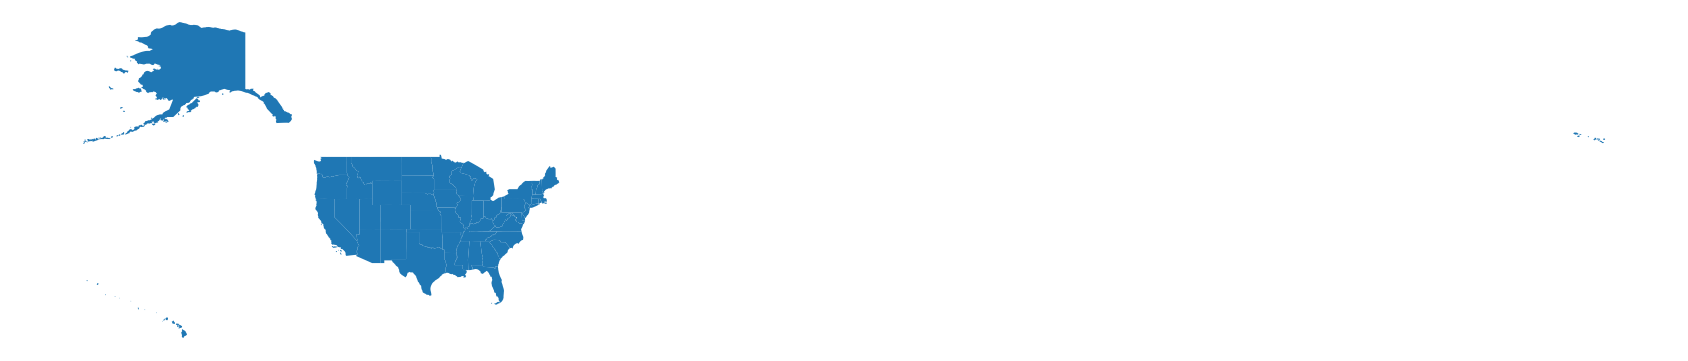

In [10]:
race_acs.plot(figsize=(30,20))
plt.axis('off')

Okay, yay! It looks like the data looks right. It is a map of the country, including Hawaii (which makes it hard to view large all at once). I also was able to turn of the axis on the map. 

Now, I just want some basic stats of the overall dataset, so I am going to run .describe() command. 

In [11]:
race_acs['Total'].describe()

count    5.000000e+01
mean     6.550675e+06
std      7.389282e+06
min      5.787590e+05
25%      1.827712e+06
50%      4.558234e+06
75%      7.530849e+06
max      3.951222e+07
Name: Total, dtype: float64

WOW! These are huge number! I am going to run a histogram to visualize how the data is distributed. 

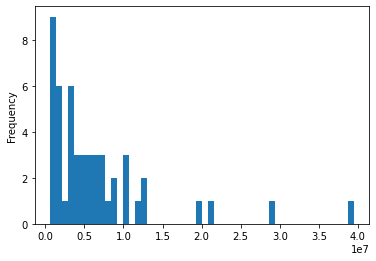

In [12]:
race_acs['Total'].plot.hist(bins=50)

Okay, it seems like the population isn't distributed very equally across states (which is to be expected, some states have many people, and others have a much smaller population).

## Household Pulse Survey Data Set Up

Okay, now that I have my ACS data set up, I am going to start working on cleaning up my Household Pulse Survey Race Data. I am first going to call in the database from my jupiterhub.

In [13]:
household_survey=pd.read_csv('/home/jovyan/206a assigment/Week 3 - Group Census Data Analysis/Household_Pulse/pulse2020_puf_21.csv')

Now that I have asked the program to sun the CSV file, I am going to get some info to see what my data looks like. This data will have a lot of data I don't want that is why I called the file household_survey for now.

In [14]:
household_survey.info

<bound method DataFrame.info of                            SCRAM  WEEK  EST_ST  EST_MSA  REGION      HWEIGHT  \
0      V210000001S33011584810122    21       1      NaN       2  6523.465009   
1      V210000001S37010215700112    21       1      NaN       2   726.793247   
2      V210000001S51010129100122    21       1      NaN       2   740.259025   
3      V210000001S71011564610122    21       1      NaN       2   740.259025   
4      V210000001S79010524210122    21      12  33100.0       2  1290.779365   
...                          ...   ...     ...      ...     ...          ...   
25687  V213600005S50050434000022    21       5      NaN       2  1122.440341   
25688  V213600005S54050282500022    21      48      NaN       2   923.573393   
25689  V213600005S70050377000012    21       5      NaN       2  4029.798532   
25690  V213600005S70050636000022    21       5      NaN       2   482.162428   
25691  V213600005S70050771100012    21       5      NaN       2   590.069809   

       

Okay, yes! That is a lot of data!!! over 20,000 columns and 188 rows!! I want to take a look at what the data set looks like as fully as I can, so I am going to set it up so I can see all of data using a .set_option () command and then run a head() and tail() command to see what the data looks like.  

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
household_survey.head()


,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,TW_START,UNEMPPAY,UI_APPLY,UI_RECV,TUI_NUMPER,SSA_RECV,SSA_APPLY,SSAPGM1,SSAPGM2,SSAPGM3,SSAPGM4,SSAPGM5,SSALIKELY,SSAEXPCT1,SSAEXPCT2,SSAEXPCT3,SSAEXPCT4,SSAEXPCT5,SSADECISN,EXPNS_DIF,CHNGHOW1,CHNGHOW2,CHNGHOW3,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,CHNGHOW8,CHNGHOW9,CHNGHOW10,CHNGHOW11,CHNGHOW12,WHYCHNGD1,WHYCHNGD2,WHYCHNGD3,WHYCHNGD4,WHYCHNGD5,WHYCHNGD6,WHYCHNGD7,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,WHYCHNGD13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,SPNDSRC8,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,PRIFOODSUF,CURFOODSUF,CHILDFOOD,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,SNAP_YN,SNAPMNTH1,SNAPMNTH2,SNAPMNTH3,SNAPMNTH4,SNAPMNTH5,SNAPMNTH6,SNAPMNTH7,SNAPMNTH8,SNAPMNTH9,SNAPMNTH10,SNAPMNTH11,SNAPMNTH12,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,DELAY,NOTGET,PRESCRIPT,MH_SVCS,MH_NOTGET,TENURE,LIVQTR,TBEDROOMS,RENTCUR,MORTCUR,MORTCONF,EVICT,FORCLOSE,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,SCHLHRS,TSTDY_HRS,TCH_HRS,TNUM_PS,PSPLANS1,PSPLANS2,PSPLANS3,PSPLANS4,PSPLANS5,PSPLANS6,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V210000001S33011584810122,21,1,NaN,2,6523.465009,6130.447755,1990,2,2,2.0,1.0,2.0,2.0,2.0,3.0,2.0,5.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,-88.0,9.0,3.0,4.0,1.0,1.0,-88.0,2.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,4.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,3.0,3.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0
1,V210000001S37010215700112,21,1,NaN,2,726.793247,1366.012701,1969,2,2,2.0,1.0,2.0,1.0,2.0,7.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,-88.0,1.0,-88.0,2.0,-88.0,0.0,2.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,4.0,-88.0,-88.0,-88.0,-88.0,-88.0,1.0,1.0,1.0,-99.0,-99.0,1.0,-99.0,1.0,-99.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,3.0,1.0,1.0,1.0,1.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,250.0,100.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,-88.0,1.0,4.0,-88.0,-88.0,1.0,-99.0,-99.0,1.0,1.0,-99.0,-99.0,-99.0,1.0,-99.0,1.0,-99.0,1.0,-99.0,1.0,-99.0,4.0,30.0,2.0,0.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,6.0
2,V210000001S51010129100122,21,1,NaN,2,740.259025,2086.982579,1959,2,2,2.0,1.0,2.0,1.0,2.0,7.0,2.0,1.0,3.0,2.0,0.0,2.0,3.0,2.0,2.0,2.0,-88.0,7.0,2.0,4.0,2.0,-88.0,0.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,1.0,-88

In [16]:
household_survey.tail()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,TW_START,UNEMPPAY,UI_APPLY,UI_RECV,TUI_NUMPER,SSA_RECV,SSA_APPLY,SSAPGM1,SSAPGM2,SSAPGM3,SSAPGM4,SSAPGM5,SSALIKELY,SSAEXPCT1,SSAEXPCT2,SSAEXPCT3,SSAEXPCT4,SSAEXPCT5,SSADECISN,EXPNS_DIF,CHNGHOW1,CHNGHOW2,CHNGHOW3,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,CHNGHOW8,CHNGHOW9,CHNGHOW10,CHNGHOW11,CHNGHOW12,WHYCHNGD1,WHYCHNGD2,WHYCHNGD3,WHYCHNGD4,WHYCHNGD5,WHYCHNGD6,WHYCHNGD7,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,WHYCHNGD13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,SPNDSRC8,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,PRIFOODSUF,CURFOODSUF,CHILDFOOD,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,SNAP_YN,SNAPMNTH1,SNAPMNTH2,SNAPMNTH3,SNAPMNTH4,SNAPMNTH5,SNAPMNTH6,SNAPMNTH7,SNAPMNTH8,SNAPMNTH9,SNAPMNTH10,SNAPMNTH11,SNAPMNTH12,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,DELAY,NOTGET,PRESCRIPT,MH_SVCS,MH_NOTGET,TENURE,LIVQTR,TBEDROOMS,RENTCUR,MORTCUR,MORTCONF,EVICT,FORCLOSE,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,SCHLHRS,TSTDY_HRS,TCH_HRS,TNUM_PS,PSPLANS1,PSPLANS2,PSPLANS3,PSPLANS4,PSPLANS5,PSPLANS6,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
25687,V213600005S50050434000022,21,5,NaN,2,1122.440341,1038.100140,1955,2,1,2.0,1.0,2.0,1.0,2.0,5.0,2.0,3.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,2.0,-88.0,12.0,2.0,4.0,2.0,-88.0,-88.0,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,3.0,2.0,1.0,-99.0,-99.0,1.0,-99.0,1.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,1.0,-99.0,-99.0,1.0,1.0,1.0,1.0,1.0,1.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,125.0,20.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,0.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,1.0
25688,V213600005S54050282500022,21,48,NaN,2,923.573393,2744.750893,1965,2,2,2.0,2.0,2.0,1.0,2.0,5.0,2.0,1.0,3.0,2.0,0.0,2.0,3.0,2.0,2.0,1.0,1.0,-88.0,1.0,-88.0,2.0,-88.0,0.0,2.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,4.0,-88.0,-88.0,-88.0,-88.0,-88.0,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,1.0,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,3.0,1.0,1.0,2.0,1.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,375.0,175.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,5.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,1.0,-99.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0
25689,V213600005S70050377000012,21,5,NaN,2,4029.798532,11180.998048,1966,2,1,2.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,0.0,2.0,3.0,2.0,2.0,1.0,2.0,-88.0,3.0,-88.0,2.0,-88.0,1.0,2.0,2.0,-88.0,-88.0,-88.0,-88.0,-88.0,4.0,-88.0,-88.0,-88.0,-88.0,-88.0,1.0,1.0,-99.0,-99.0,-

Okay! Yikes! This is a lot of info. Thankfully they provide a data dictionary I can take a look to select the info I actually want!

 All of the data should belong to week 21, to double check. I am going to run a histogram.

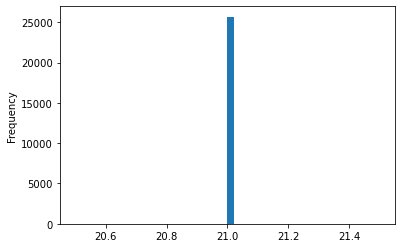

In [17]:
household_survey['WEEK'].plot.hist(bins=50)

Yep, it's only week 21! 

Okay, now I have to narrow the columns I want. I will spend some time labeling the data. Before I get there, I am going to look at the all the columns I have so I can start narrowing them down.

In [18]:
household_survey.columns.to_list()

['SCRAM',
 'WEEK',
 'EST_ST',
 'EST_MSA',
 'REGION',
 'HWEIGHT',
 'PWEIGHT',
 'TBIRTH_YEAR',
 'ABIRTH_YEAR',
 'EGENDER',
 'AGENDER',
 'RHISPANIC',
 'AHISPANIC',
 'RRACE',
 'ARACE',
 'EEDUC',
 'AEDUC',
 'MS',
 'THHLD_NUMPER',
 'AHHLD_NUMPER',
 'THHLD_NUMKID',
 'AHHLD_NUMKID',
 'THHLD_NUMADLT',
 'WRKLOSS',
 'EXPCTLOSS',
 'ANYWORK',
 'KINDWORK',
 'RSNNOWRK',
 'TW_START',
 'UNEMPPAY',
 'UI_APPLY',
 'UI_RECV',
 'TUI_NUMPER',
 'SSA_RECV',
 'SSA_APPLY',
 'SSAPGM1',
 'SSAPGM2',
 'SSAPGM3',
 'SSAPGM4',
 'SSAPGM5',
 'SSALIKELY',
 'SSAEXPCT1',
 'SSAEXPCT2',
 'SSAEXPCT3',
 'SSAEXPCT4',
 'SSAEXPCT5',
 'SSADECISN',
 'EXPNS_DIF',
 'CHNGHOW1',
 'CHNGHOW2',
 'CHNGHOW3',
 'CHNGHOW4',
 'CHNGHOW5',
 'CHNGHOW6',
 'CHNGHOW7',
 'CHNGHOW8',
 'CHNGHOW9',
 'CHNGHOW10',
 'CHNGHOW11',
 'CHNGHOW12',
 'WHYCHNGD1',
 'WHYCHNGD2',
 'WHYCHNGD3',
 'WHYCHNGD4',
 'WHYCHNGD5',
 'WHYCHNGD6',
 'WHYCHNGD7',
 'WHYCHNGD8',
 'WHYCHNGD9',
 'WHYCHNGD10',
 'WHYCHNGD11',
 'WHYCHNGD12',
 'WHYCHNGD13',
 'SPNDSRC1',
 'SPNDSRC2',
 'SPND

Okay, I can see all my columns. I am using the data dictionary to understand what the columns represent. I am now going to select a narrow set of columns to keep for analysis. 

In [19]:
columns_to_keep_2 = ['SCRAM', 'EST_ST', 
 'RHISPANIC', 'RRACE']
race_pulse=household_survey[columns_to_keep_2].copy()
race_pulse.sample(10)

,SCRAM,EST_ST,RHISPANIC,RRACE
3741,V210430001S31310954000022,31,1.0,1.0
6259,V210800008S31080968300022,8,1.0,1.0
20912,V212910464M51330477000012,21,1.0,1.0
19668,V212730003S11330633400012,33,1.0,1.0
12992,V211740009S53490834700022,49,1.0,1.0
12491,V211700008S50080410300012,8,1.0,1.0
13225,V211810003S51131322300022,13,1.0,1.0
11496,V211530987M30100535000012,10,1.0,1.0
17407,V212410008S94181131410012,18,1.0,1.0
23471,V213240861M31060774600012,6,1.0,1.0


Yay! Now I have a much smaller set of data so that I can do some analysis. However, the data is not organized the same way as the ACS database. Thankfully, though, the RHispanic variable has data about whether or not someone is Hispanic. The RRace variable has data about White, Black, Asian, Any other race-- Alone (excluding anyone who said they were Hispanic). 

In [20]:
race_pulse.columns=['id', 'state', 'Hispanic_Race', 'Non_Hispanic_Race']
race_pulse.head()

,id,state,Hispanic_Race,Non_Hispanic_Race
0,V210000001S33011584810122,1,1.0,2.0
1,V210000001S37010215700112,1,1.0,1.0
2,V210000001S51010129100122,1,1.0,1.0
3,V210000001S71011564610122,1,1.0,1.0
4,V210000001S79010524210122,12,1.0,1.0


Okay, yay! I relabeled my data! I still have to clean up the row value for the State and Non Hispanic Race columns. Yet, I know that I have more than one response for each state. First I want to see how many responses I have for each state so I am goin gto run a histogram.

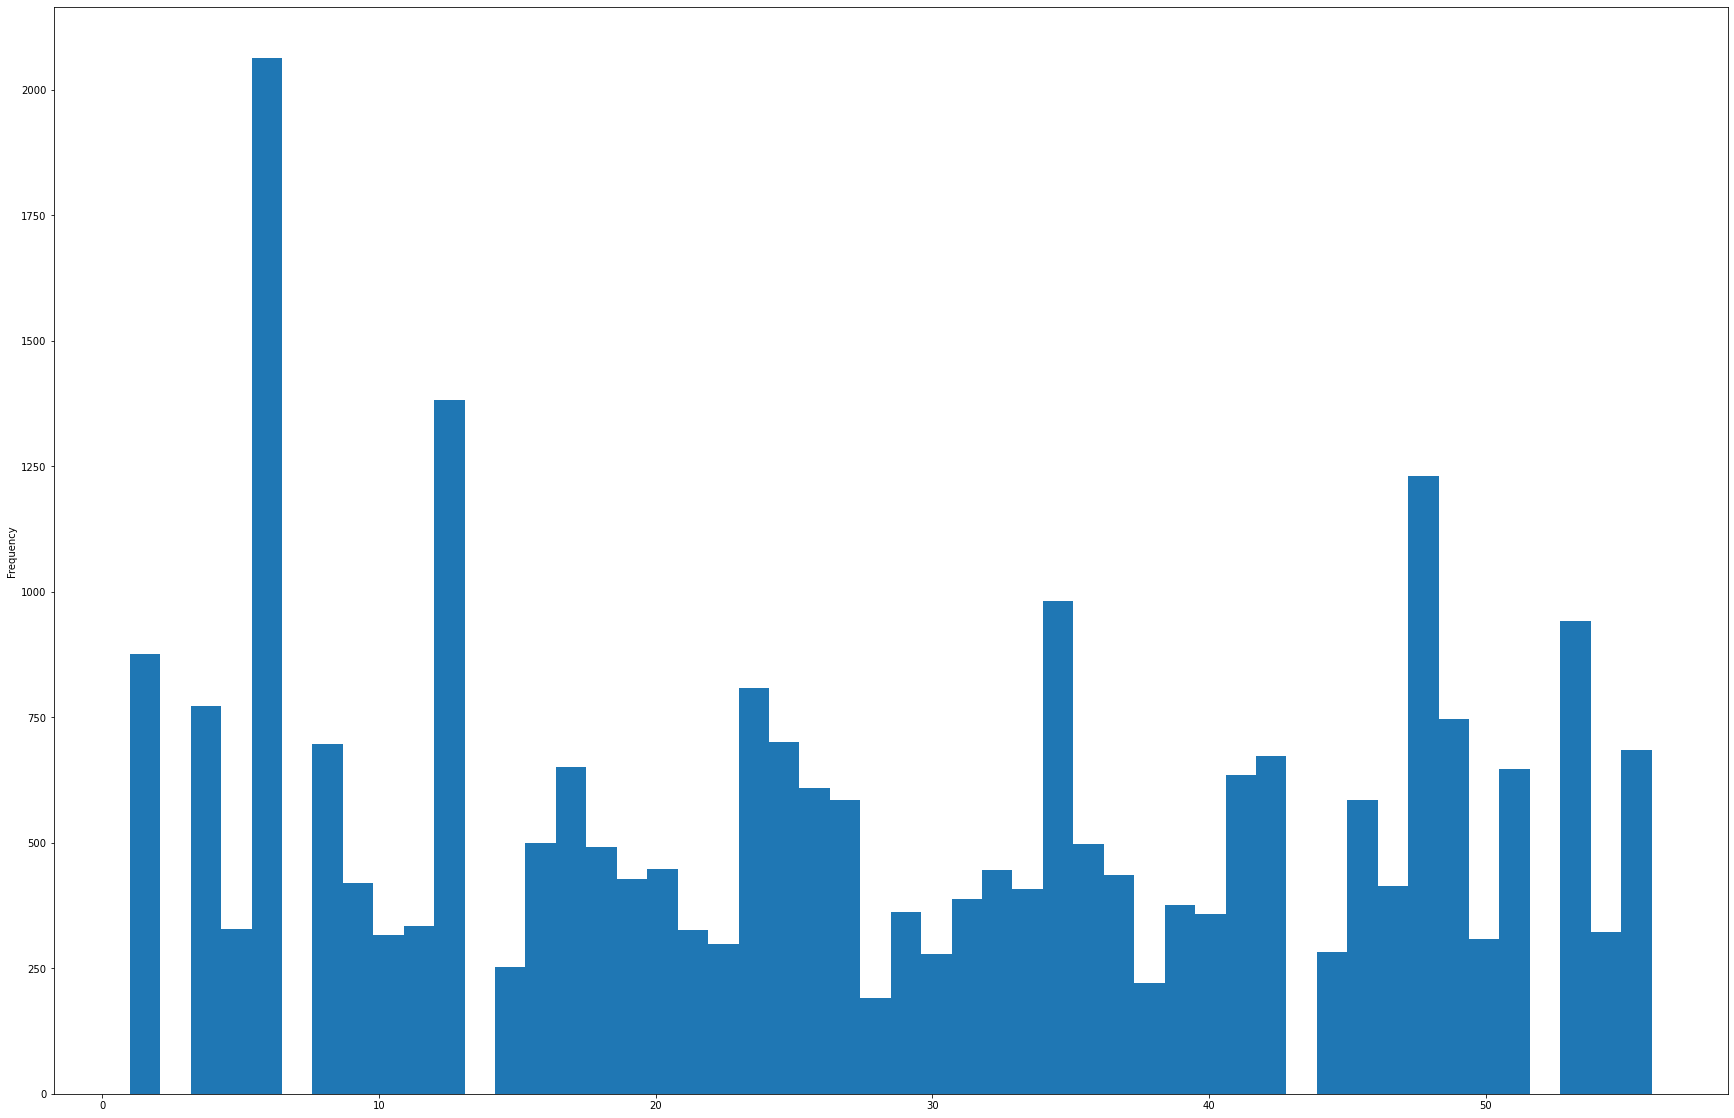

In [21]:
race_pulse['state'].plot.hist(bins=50, figsize=(30,20))

Okay, that seems to show me that some states have a lot of responses while others dont' have as many. I am going to have to sum up the number of people in each state who belong to each racial category. To make sure end up doing it right, I am going to run a value.couts() command. 

In [22]:
race_pulse.state.value_counts()

6     2062
48    1231
53     941
12     885
4      773
49     746
25     701
8      697
42     673
17     650
51     646
41     634
26     609
27     586
24     578
2      535
16     499
35     499
36     497
13     497
18     491
34     483
20     447
32     446
37     435
19     427
9      419
47     414
55     409
33     408
31     387
39     376
29     362
40     358
1      340
45     337
11     335
5      328
21     327
54     323
10     316
50     308
22     299
44     282
30     279
56     275
15     252
46     249
23     231
38     220
28     190
Name: state, dtype: int64

Now that I know how many people belong to each group, I am going to know what the total population in this sample should be for each state.

Before I can combine these together to oly get one value per state, I am goin going to have to make it so that each value under the race column has it's own variable! To make sure I don't accidently do it incorrectly, I am going to count up how many values for each race there are. 

In [23]:
race_pulse.Non_Hispanic_Race.value_counts()

1.0    21326
2.0     1927
4.0     1253
3.0     1185
Name: Non_Hispanic_Race, dtype: int64

Okay cool! Now I know how many people there are of each race in this sample. Let's start making the new columns!! 

First, I am going to create a new column in the data frame. Then, I will select only the data equal to the value "1" (or Non-Hispanic White) so that all the values that equal have a one in the new column and everything else doesn't have a value.

Okay, so after about 3 hours of troubleshooting... I finally figure out how to convert create new columns from existing variables into new columns. WOW!! Nothing like the feeling of relief after all the frustration from not being able to figure out something so simple....

But for sake of my sanity, I will not attempt to do a loop right now and just create three different columns for non_hispanic_white, non_hispanic_black, non_hispanic_asian, non_hispanic_other (won't be using this.. but I still have to do more variable conversion so for now...). 

In [24]:
def non_hispanic_white(c):
    if c["Non_Hispanic_Race"] == 1.0:
         return 1
    else:
         return 0
race_pulse['non_hispanic_white']= race_pulse.apply(non_hispanic_white, axis=1)

In [25]:
def non_hispanic_black(c):
    if c["Non_Hispanic_Race"] == 2.0:
         return 1
    else:
         return 0
race_pulse['non_hispanic_black']= race_pulse.apply(non_hispanic_black, axis=1)

In [26]:
def non_hispanic_asian(c):
    if c["Non_Hispanic_Race"] == 3.0:
         return 1
    else:
         return 0
race_pulse['non_hispanic_asian']= race_pulse.apply(non_hispanic_asian, axis=1)

In [27]:

def non_hispanic_other(c):
    if c["Non_Hispanic_Race"] == 4.0:
         return 1
    else:
         return 0
race_pulse['non_hispanic_other']= race_pulse.apply(non_hispanic_other, axis=1)

In [28]:
race_pulse.sample(100)

,id,state,Hispanic_Race,Non_Hispanic_Race,non_hispanic_white,non_hispanic_black,non_hispanic_asian,non_hispanic_other
11336,V211520009S72291287900012,29,1.0,1.0,1,0,0,0
13191,V211800008S50080776200022,8,1.0,1.0,1,0,0,0
10470,V211410005S30150865800012,15,1.0,3.0,0,0,1,0
20025,V212750006S30560236900012,56,1.0,1.0,1,0,0,0
20246,V212810829M52261931500022,26,1.0,1.0,1,0,0,0
720,V210100001S34010935300122,1,1.0,1.0,1,0,0,0
21898,V213040000S34401989610022,40,1.0,1.0,1,0,0,0
4078,V210450000S70500026100012,33,1.0,1.0,1,0,0,0
22768,V213140907M13240771400022,24,1.0,1.0,1,0,0,0
20180,V212810009S36191378410022,19,1.0,1.0,1,0,0,0


Okay yay!! It seems like it worked!!!! WOW.. Okay, I'll try to explain it but since it took me so long to figure out I might still not be 100% sure what's going on... so I used the def function to create a new function with values "c", then I define what "c" should be equal to using "if and else" commands. Then finally, I had to add the new column on the race_pulse dataset, I was able to do that by doing race_pulse['new column'] and then used the .apply command to insert the new column I hadd already created using the argument axis=1 in order to make sure that the function was added to the rows? 

Okay, just to double check that it's actually right, now I am going to run .value_count() commands for each of the columns I created to make sure that they match the values of the Non_hispanic_Race column. 

In [29]:
race_pulse.non_hispanic_white.value_counts()

1    21326
0     4366
Name: non_hispanic_white, dtype: int64

In [30]:
race_pulse.non_hispanic_black.value_counts()

0    23765
1     1927
Name: non_hispanic_black, dtype: int64

In [31]:
race_pulse.non_hispanic_asian.value_counts()

0    24507
1     1185
Name: non_hispanic_asian, dtype: int64

In [32]:
race_pulse.non_hispanic_other.value_counts()

0    24439
1     1253
Name: non_hispanic_other, dtype: int64

Okay, yay!! They do!!

Now I still have a few more steps before I can get to comparing my two databases. I know have to aggregate the state data so I get full value count for each state.

Before that though, just realized that the hispanic variable is coded 1= non huspanic, and 2- Hispanic. I am going to create a new variable so that Hispanic=1 and Non-Hispanic=0. I will use the same process I used to create the other race columns. 

In [33]:
def hispanic(c):
    if c["Hispanic_Race"] == 2.0:
         return 1
    else:
         return 0
race_pulse['hispanic']= race_pulse.apply(hispanic, axis=1)

In [34]:
race_pulse.sample(25)

,id,state,Hispanic_Race,Non_Hispanic_Race,non_hispanic_white,non_hispanic_black,non_hispanic_asian,non_hispanic_other,hispanic
1922,V210140907M10110647010122,11,1.0,1.0,1,0,0,0,0
22859,V213200002S07021939010012,2,1.0,1.0,1,0,0,0,0
6877,V210850004S77540264310022,54,1.0,1.0,1,0,0,0,0
13298,V211810109M93481581110012,48,1.0,1.0,1,0,0,0,0
16436,V212240007S56470046500012,47,1.0,2.0,0,1,0,0,0
16111,V212220000S55200472300022,20,1.0,1.0,1,0,0,0,0
2090,V210200005S34051635710022,5,1.0,1.0,1,0,0,0,0
13468,V211830002S30320579200012,32,1.0,3.0,0,0,1,0,0
753,V210100002S02020597200112,17,1.0,1.0,1,0,0,0,0
16257,V212230005S52350583110012,17,2.0,1.0,1,0,0,0,1


In [35]:
race_pulse.Hispanic_Race.value_counts()

1.0    23373
2.0     2318
Name: Hispanic_Race, dtype: int64

In [36]:
race_pulse.hispanic.value_counts()

0    23374
1     2318
Name: hispanic, dtype: int64

Okay, great the data for the new hispanic variable matches! Now time to add up the values for each race by state. I will only be focusing on Hispanic, non hispanic White, non hispanic Black, and non hispanic Asian. 

Okay, this part too took a few more hours! Lots of mistakes were made, but at the end the issue was the column type. Learning about the little details every step of the way. Anyway, I erase the mistakes now time to explaing what worked. 

OKay, just briefly, I had to go up to my function to create my new columns and I change return = "1.0" to return = 1. That ended up changing the column type. I had tried using other commands to change it, but I keep getting errors. 

Once I change the vcolumn type, I then ran a .groupby state and race column with a sum, as seen below.

In [37]:
race_pulse.groupby('state')['non_hispanic_white'].sum()

state
1      269
2      427
4      657
5      279
6     1517
8      621
9      371
10     237
11     216
12     737
13     346
15      89
16     478
17     513
18     434
19     407
20     403
21     295
22     225
23     208
24     367
25     608
26     504
27     539
28     134
29     311
30     257
31     360
32     354
33     387
34     377
35     423
36     381
37     342
38     209
39     335
40     276
41     563
42     580
44     239
45     271
46     229
47     339
48     977
49     709
50     295
51     499
53     794
54     304
55     378
56     256
Name: non_hispanic_white, dtype: int64

Once I saw that the command I ran actually gave me the different values (before when the variables were objects I keep getting the total # of respondants for each state as opposed to a different number for just people who indicated they were white). To double check my work.

I did this for all 4 race columns I am interested in, however, since I want to create a an index for the race data. See below:  

In [38]:
race_state_pulse= race_pulse.groupby('state', as_index= False).agg({ 'hispanic':"sum", 'non_hispanic_white':"sum", 'non_hispanic_black':"sum", 'non_hispanic_asian':"sum"})
print(race_state_pulse)

    state  hispanic  non_hispanic_white  non_hispanic_black  \
0       1         7                 269                  48   
1       2        26                 427                  13   
2       4       103                 657                  32   
3       5         9                 279                  33   
4       6       460                1517                 115   
5       8        66                 621                  22   
6       9        39                 371                  25   
7      10        24                 237                  54   
8      11        27                 216                  86   
9      12       171                 737                  89   
10     13        20                 346                 123   
11     15        21                  89                   5   
12     16        32                 478                   2   
13     17        67                 513                  57   
14     18        16                 434                

OMGG YESS!! FINALLYYYY!! I have a data source that I can join with a shape file so I can start mapping and comparing!!! OMG THAT TOOK LONG!!!!!!!!!!!!!!!!!!!

Now, I want to verify each race column actually adds to the total number of people for that race in the original df. So, I am going to run some .sum() commands on my new data.  

In [39]:
race_state_pulse.non_hispanic_white.sum()

21326

In [40]:
race_state_pulse.non_hispanic_black.sum()

1927

In [41]:
race_state_pulse.non_hispanic_asian.sum()

1185

In [42]:
race_state_pulse.hispanic.sum()

2318

YESS!! They do add up!! Now, though I am missing a total column so I can actually now how many people responded in each state. I am going to run a command to sum up the rows for each state. 

In [43]:
race_state_pulse['Total']=  race_state_pulse[['hispanic', 'non_hispanic_white', 'non_hispanic_black', 'non_hispanic_asian']].sum(axis=1)
race_state_pulse.head()

,state,hispanic,non_hispanic_white,non_hispanic_black,non_hispanic_asian,Total
0,1,7,269,48,7,331
1,2,26,427,13,20,486
2,4,103,657,32,33,825
3,5,9,279,33,4,325
4,6,460,1517,115,274,2366


Okay! Now I have added a row with the total number of people in each state... this sample size seem way too small. I think we will def need to learn how to use the weights if we want to work with the data for our final project. 

Just because I been having so many issue with column types, I am going to run a .dtypes command.

In [44]:
race_state_pulse.dtypes

state                 int64
hispanic              int64
non_hispanic_white    int64
non_hispanic_black    int64
non_hispanic_asian    int64
Total                 int64
dtype: object

Okay, all of my variables are integers!! Now I still need to change the values of the state column to mean something. 

Before I get to that however, I am going to call in my census state shape file so my data can have geographic info and I can map it. I am going to bring it in first, that way I can figure out how I need to structure the state column in my current data to join to the new shapefile. 

In [45]:
state_shape = gpd.read_file('/home/jovyan/206a assigment/Week 3 - Group Census Data Analysis/Census State Shapefile/tl_2019_us_state.shp')
state_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   REGION    56 non-null     object  
 1   DIVISION  56 non-null     object  
 2   STATEFP   56 non-null     object  
 3   STATENS   56 non-null     object  
 4   GEOID     56 non-null     object  
 5   STUSPS    56 non-null     object  
 6   NAME      56 non-null     object  
 7   LSAD      56 non-null     object  
 8   MTFCC     56 non-null     object  
 9   FUNCSTAT  56 non-null     object  
 10  ALAND     56 non-null     int64   
 11  AWATER    56 non-null     int64   
 12  INTPTLAT  56 non-null     object  
 13  INTPTLON  56 non-null     object  
 14  geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 6.7+ KB


Now I have called in the shape file and looked at it's data format. I still want to learn omre, like how will I be able to joint with my other file, so I'll run a .head() command. 

In [46]:
state_shape.head(20)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677787140,1323663210,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049897859,2391604238,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23189198255,1026903434,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125925929633,13463401534,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23874197924,1030383955,+44.0685773,-072.6691839,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


Great! Okay, so the numbers match the numbers in my race_state_pulse data, however, my race_state_pulse data doesn't have a zero infront of the 1-9 numbers. I will have to add it and also convert my state varible to an object. 

Before, I do that however, I want to see what my shape file looks like so I'm going to plot it. 

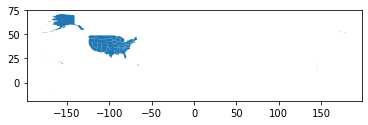

In [47]:
state_shape.plot()

YAY! It's a photo of the 50 states. Okay, now I have to change the state column in my state_pulse data. 

In [48]:
race_state_pulse['state']= race_state_pulse['state'].apply(lambda x :'{0:0>2}'.format(x))
race_state_pulse.head(50)

,state,hispanic,non_hispanic_white,non_hispanic_black,non_hispanic_asian,Total
0,01,7,269,48,7,331
1,02,26,427,13,20,486
2,04,103,657,32,33,825
3,05,9,279,33,4,325
4,06,460,1517,115,274,2366
5,08,66,621,22,25,734
6,09,39,371,25,14,449
7,10,24,237,54,13,328
8,11,27,216,86,17,346
9,12,171,737,89,23,1020


YAY! I was able to add the zero infront of states with a row value less than zero. Now, I have to check what type of column my data is. 

In [49]:
race_state_pulse.dtypes

state                 object
hispanic               int64
non_hispanic_white     int64
non_hispanic_black     int64
non_hispanic_asian     int64
Total                  int64
dtype: object

okay! so it seems like the code I used to add the zero also converted my data to an object!! Now I just have to rename my column so it matches the name of the GEOID column in the shape file data.

In [50]:
race_state_pulse.columns = ['GEOID',
  'hispanic', 'non_hispanic_white', 'non_hispanic_black', 'non_hispanic_asian', 'Total']

race_state_pulse.head()

,GEOID,hispanic,non_hispanic_white,non_hispanic_black,non_hispanic_asian,Total
0,01,7,269,48,7,331
1,02,26,427,13,20,486
2,04,103,657,32,33,825
3,05,9,279,33,4,325
4,06,460,1517,115,274,2366


merge_data= race_state_pulse.set_index('GEOID').join(state_shape.set_index('GEOID'))

merge_data.plot()

In [51]:
race_pulse_geo= state_shape.merge(race_state_pulse, on='GEOID')
race_pulse_geo.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,hispanic,non_hispanic_white,non_hispanic_black,non_hispanic_asian,Total
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",12,304,8,2,326
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",171,737,89,23,1020
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",67,513,57,48,685
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",21,539,12,16,588
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",31,367,144,49,591


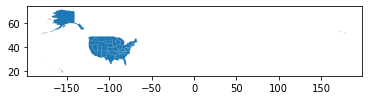

In [52]:
race_pulse_geo.plot()

Yess!! The data seems to be working! It's mapping. I was able to get merge as a geodataframe.

Okay, so after all that struggle, I think I'm ready to compare the two data set. I don't think the household pulse data will be super representative, and we will have to learn how to use the weights probably, but at least I have learned some valuable lessons.

* Always check and double-check the data types-- just because it appears as an integer when you are doing a value. count() doesn't mean it is an actual integer. 
* I also learned how to use a function to create a new set of data from an existing column and how to turn that function into a new column into my data set 
* AND, I also learn how to aggregate data from multiple columns to create a new data frame (using a group by function) 

So all in all, I think it's been a successful weekend. Now time to start graphing and comparing the two data sets!!

## Comparing the Dataset

Okay, now is time I start comparing the data! I am going to make 4 sets of maps, comparing the prevelance of Hispanics, Non Hispanic White, Non Hispanic Black, and Non Hispanic Asian between the 2019 ACS 1 year estimate and the Household Pulse Dec 9 to Dec 21 data sets. Before I do that though, I will normalize both data sets. 

In [53]:
race_acs['Percent Hispanic']= race_acs['Hispanic']/race_acs['Total']*100
race_acs['Percent Non Hispanic White']= race_acs['Non Hispanic White']/race_acs['Total']*100
race_acs['Percent Non Hispanic Black']= race_acs['Non Hispanic Black']/race_acs['Total']*100
race_acs['Percent Non Hispanic Asian']= race_acs['Non Hispanic Asian']/race_acs['Total']*100
race_acs.sample(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic Asian
47,04000US51,Virginia,8535519.0,7707365.0,5212705.0,1625942.0,17497.0,560030.0,4347.0,23329.0,263515.0,828154.0,"MULTIPOLYGON (((-77.32832 39.05768, -77.32830 ...",9.702445,61.070744,19.049129,6.561171
23,04000US26,Michigan,9986857.0,9460884.0,7457021.0,1350329.0,52365.0,325616.0,1900.0,10364.0,263289.0,525973.0,"MULTIPOLYGON (((-86.46412 45.32481, -86.46452 ...",5.266652,74.668347,13.521061,3.260445
24,04000US27,Minnesota,5639632.0,5325415.0,4451938.0,362789.0,51930.0,283422.0,2618.0,12703.0,160015.0,314217.0,"MULTIPOLYGON (((-96.78438 46.63050, -96.78434 ...",5.571587,78.940222,6.432849,5.025541
44,04000US48,Texas,28995881.0,17471039.0,11929568.0,3442881.0,77748.0,1430236.0,21484.0,43532.0,525590.0,11524842.0,"MULTIPOLYGON (((-103.98018 32.00012, -103.9799...",39.746480,41.142285,11.873690,4.932549
48,04000US53,Washington,7614893.0,6623170.0,5126694.0,295239.0,86811.0,680421.0,48667.0,14188.0,371150.0,991723.0,"MULTIPOLYGON (((-123.24792 48.28456, -123.2475...",13.023466,67.324570,3.877126,8.935398


In [54]:
race_pulse_geo['Percent Hispanic']= race_pulse_geo['hispanic']/race_pulse_geo['Total']*100
race_pulse_geo['Percent Non Hispanic White']= race_pulse_geo['non_hispanic_white']/race_pulse_geo['Total']*100
race_pulse_geo['Percent Non Hispanic Black']= race_pulse_geo['non_hispanic_black']/race_pulse_geo['Total']*100
race_pulse_geo['Percent Non Hispanic Asian']= race_pulse_geo['non_hispanic_asian']/race_pulse_geo['Total']*100
race_pulse_geo.sample(5)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,hispanic,non_hispanic_white,non_hispanic_black,non_hispanic_asian,Total,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic Asian
13,4,9,06,01779778,06,CA,California,00,G4000,A,403660088482,20305454540,+37.1551773,-119.5434183,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378...",460,1517,115,274,2366,19.442096,64.116653,4.860524,11.580727
14,1,2,34,01779795,34,NJ,New Jersey,00,G4000,A,19048848841,3543837357,+40.1072744,-074.6652012,"POLYGON ((-75.18960 40.59178, -75.18977 40.592...",40,377,49,38,504,7.936508,74.801587,9.722222,7.539683
27,3,5,45,01779799,45,SC,South Carolina,00,G4000,A,77864659170,5075874513,+33.8741776,-080.8542639,"POLYGON ((-82.74210 34.21190, -82.74225 34.212...",13,271,54,2,340,3.823529,79.705882,15.882353,0.588235
38,2,3,26,01779789,26,MI,Michigan,00,G4000,A,146608689865,103878116983,+44.8441768,-085.6604907,"POLYGON ((-86.46412 45.32481, -86.46452 45.324...",25,504,66,21,616,4.058442,81.818182,10.714286,3.409091
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",12,304,8,2,326,3.680982,93.251534,2.453988,0.613497


Yay! Both data are normalize. Now I am just goin gto do some plots!! I will start with mapping out the percent Hispanic in each database. 

Text(0.5, 1.0, 'Household Pulse Percent  Hispanic')

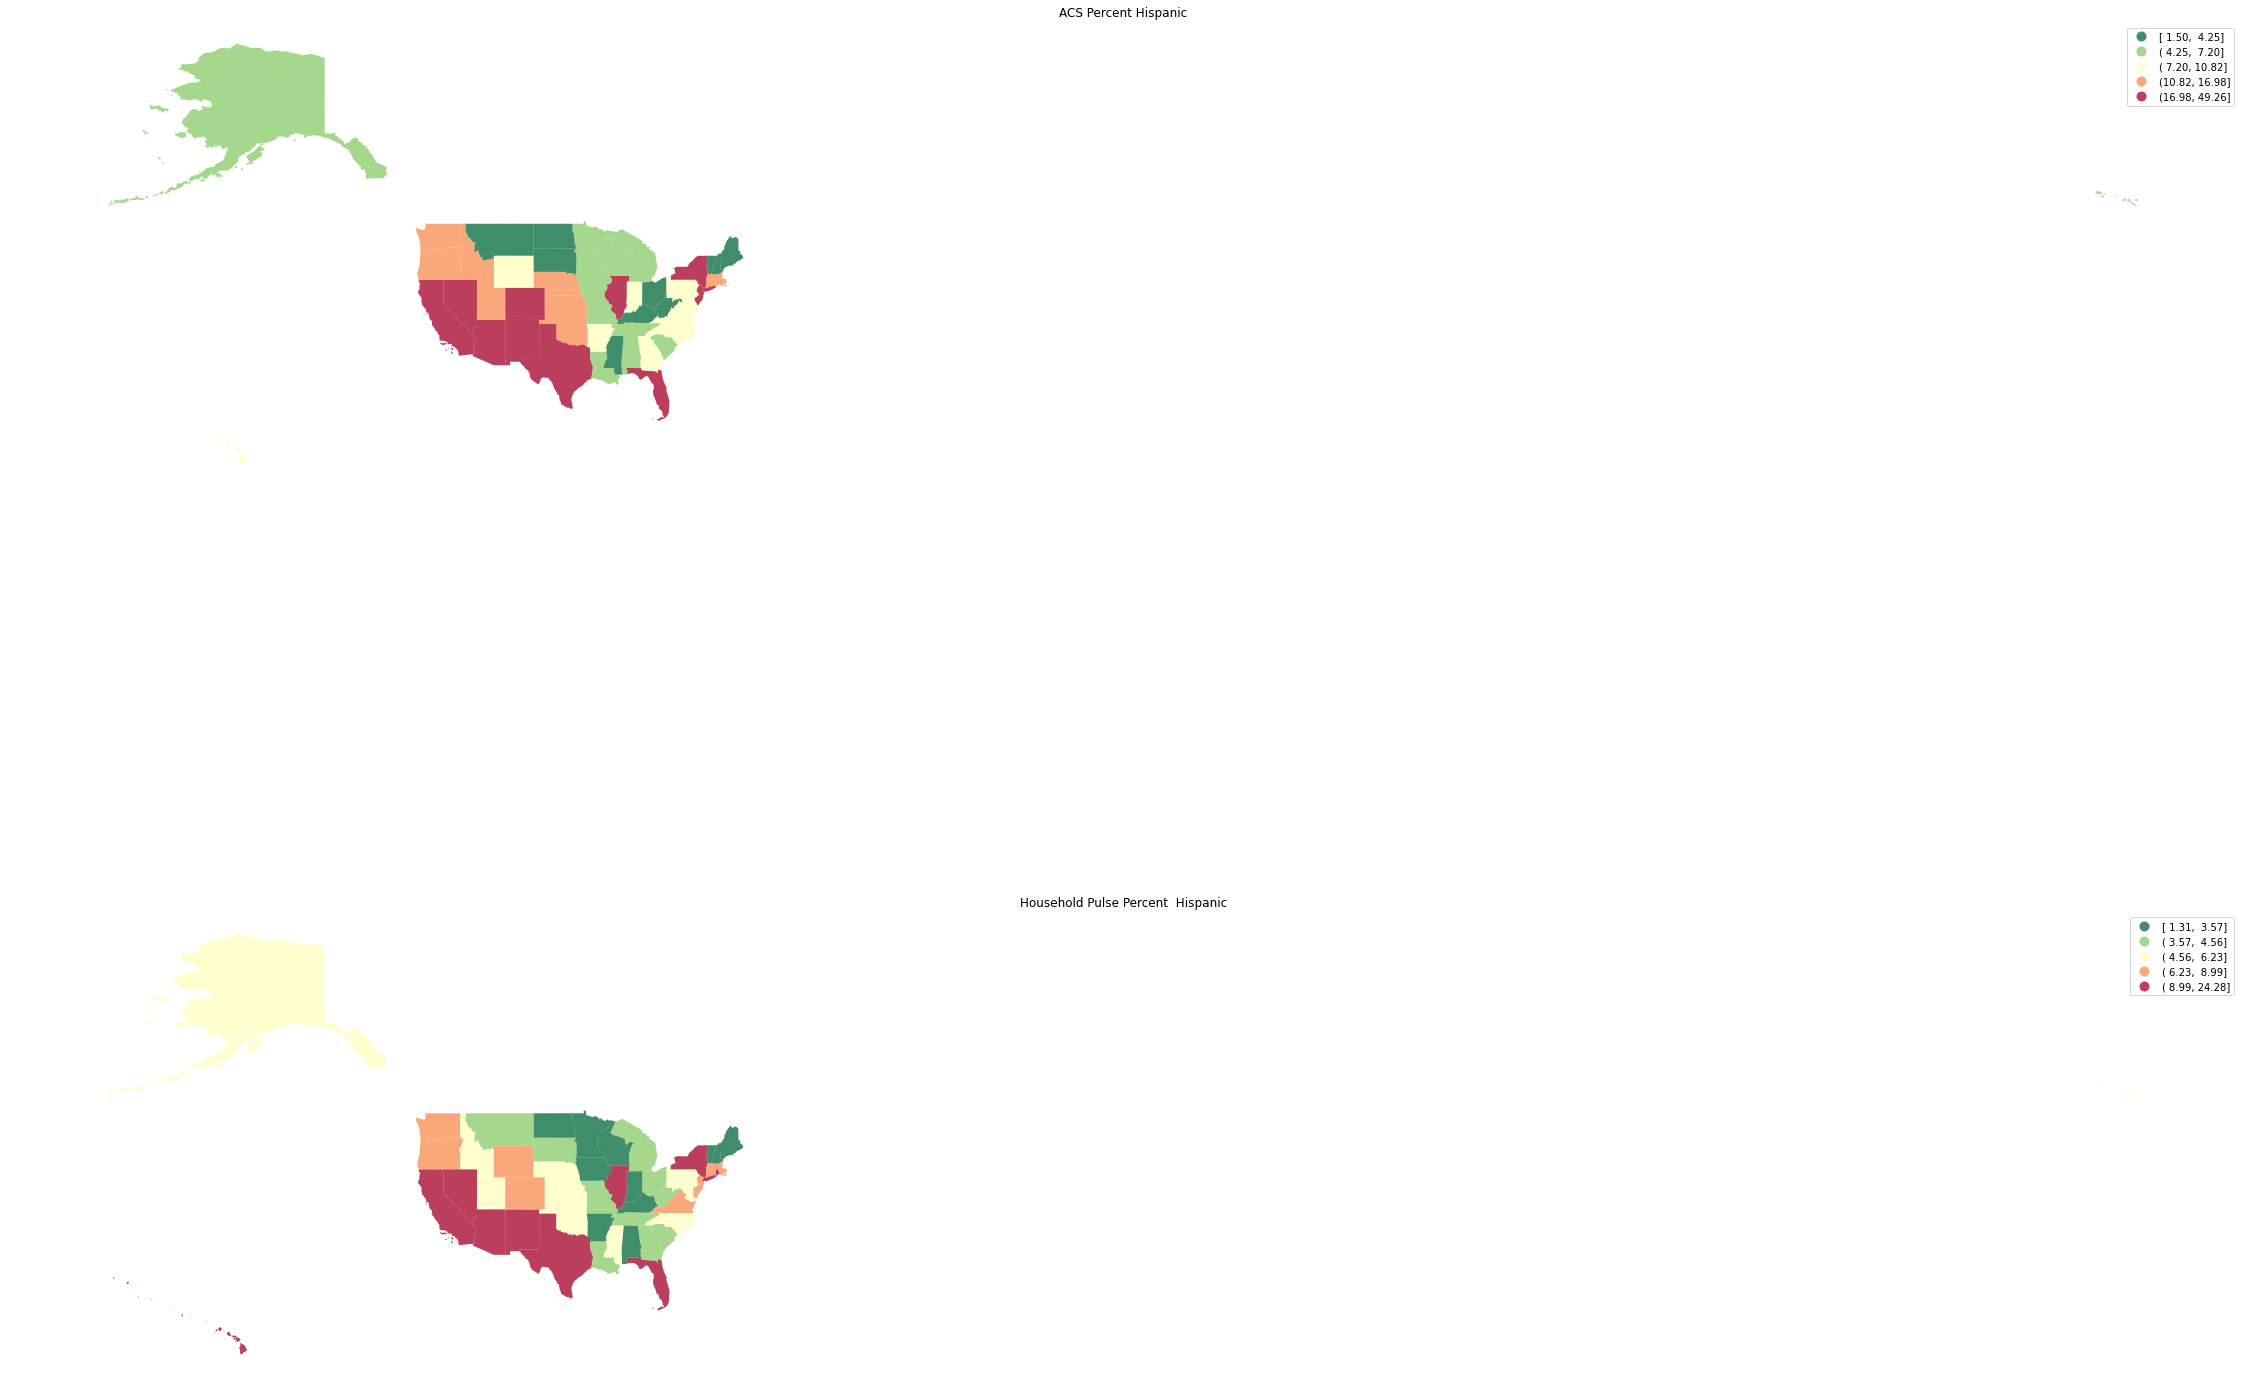

In [55]:
fig, axs = plt.subplots(2, 1, figsize=(40, 30 ))


ax1, ax2 = axs


race_acs.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("ACS Percent Hispanic")


race_pulse_geo.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Household Pulse Percent  Hispanic")

It seems like there a lot of the states fall within the same percentage quintile of percent hispanic, however not all. To now is Alaska, which is in a higher quintile percentage for the amount of Hispanic in the Household pulse data than in the ACS data. 

First I will do a map comparing percentage Non White Hispanic. 

Text(0.5, 1.0, 'Household Pulse  Percent Non Hispanic White')

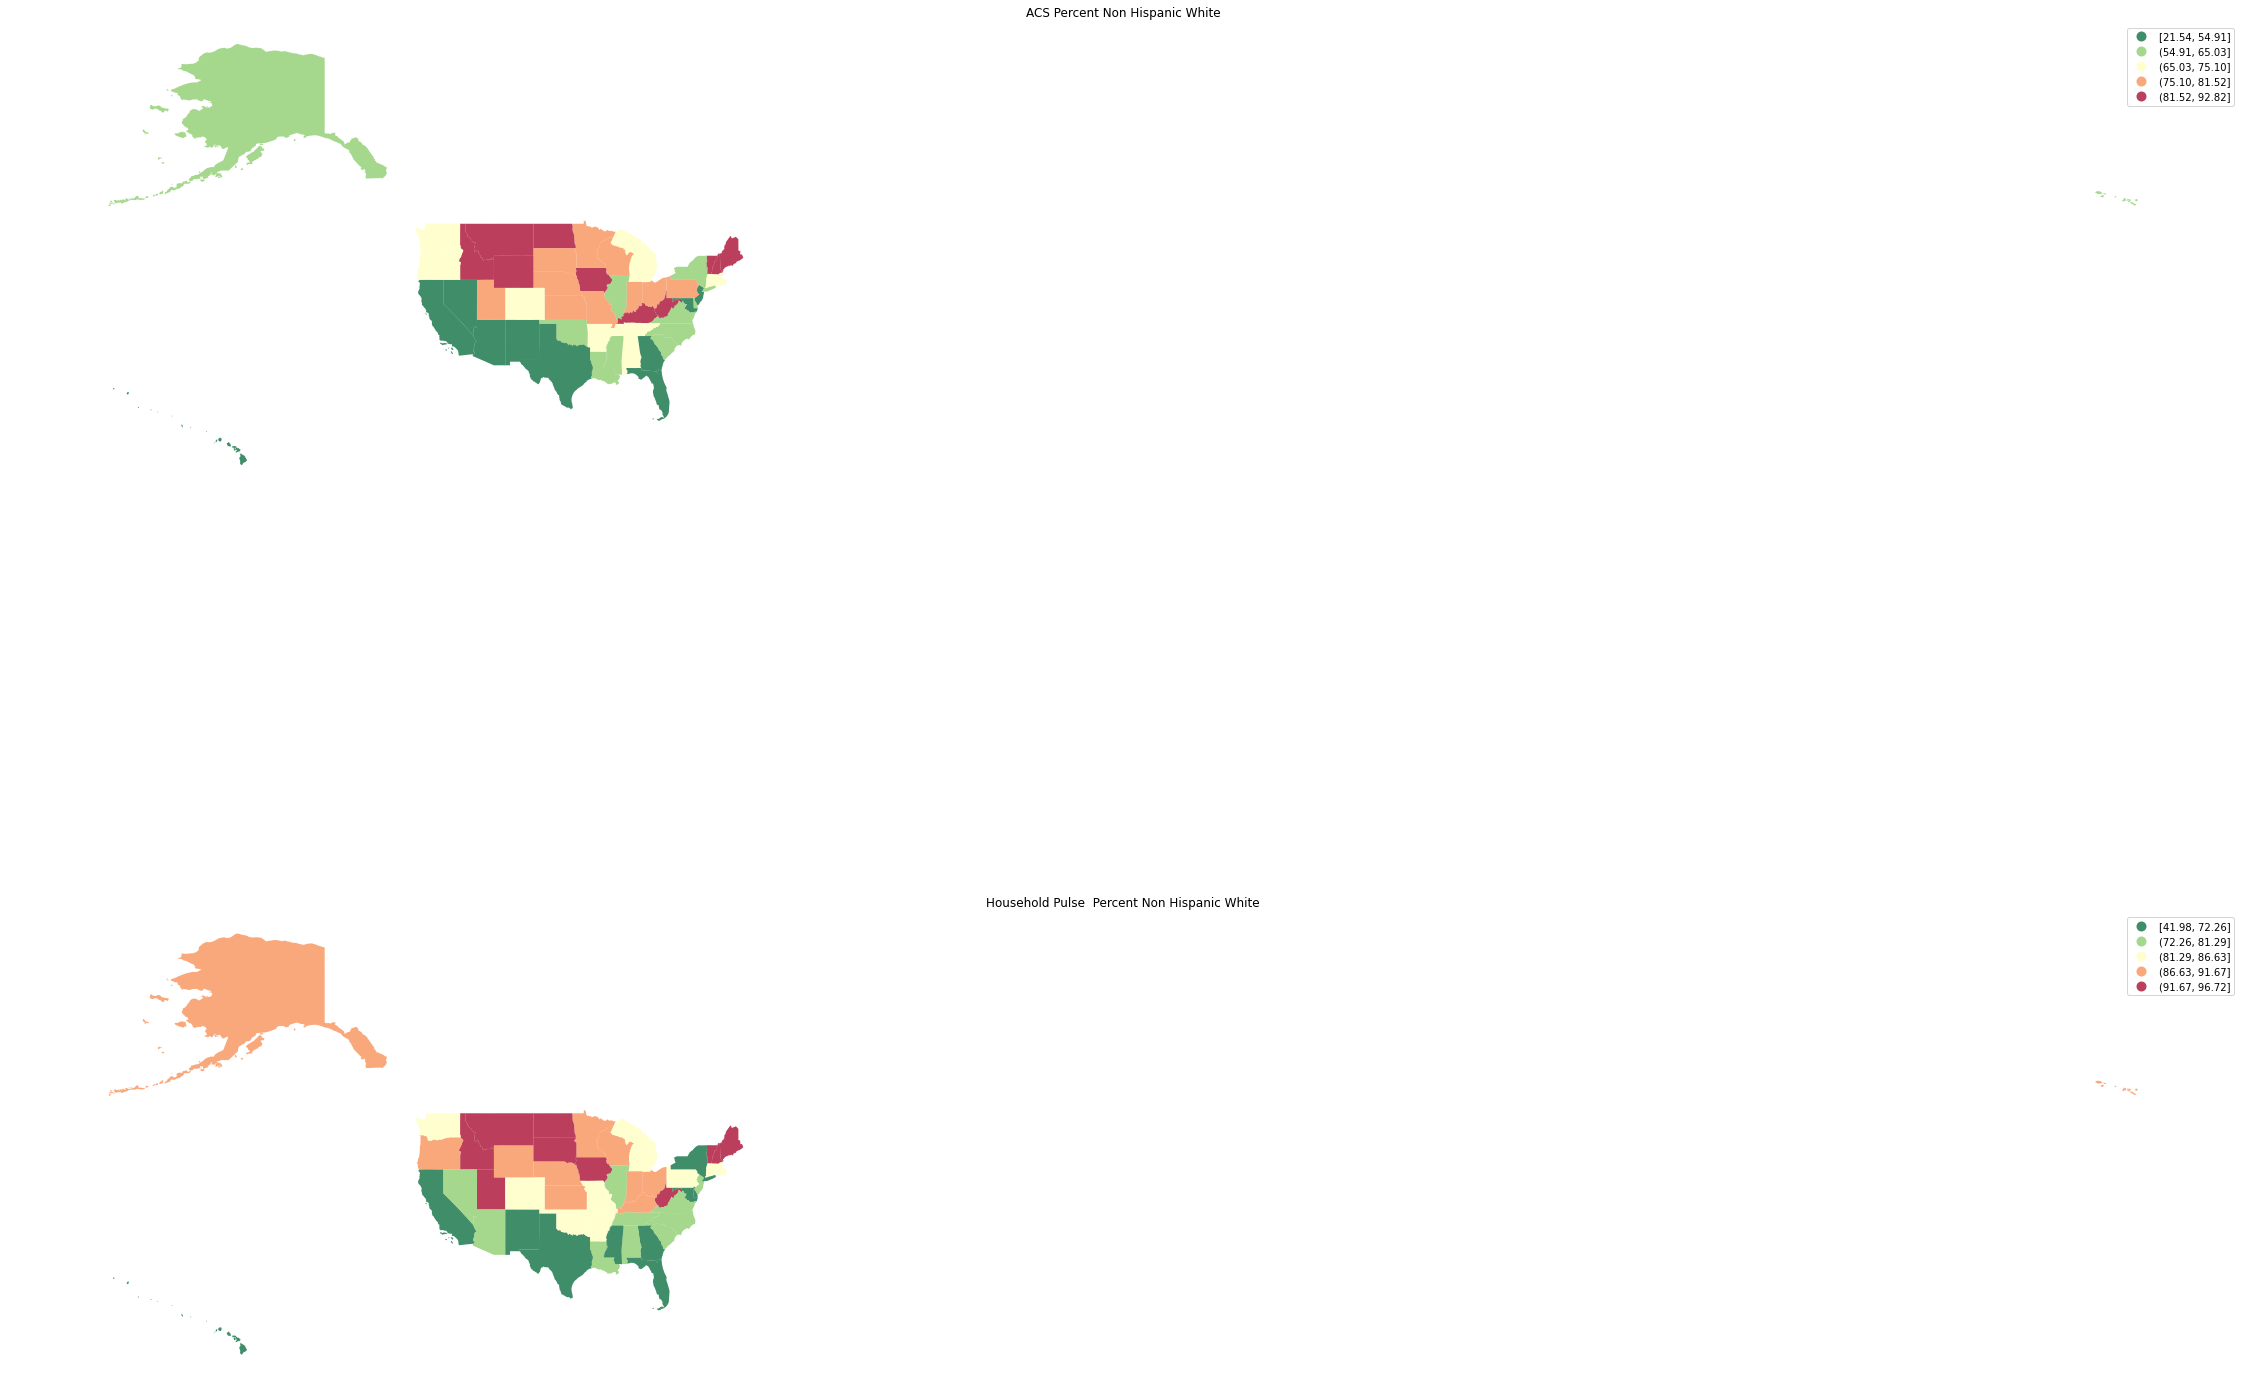

In [56]:
fig, axs = plt.subplots(2, 1, figsize=(40, 30 ))

ax1, ax2 = axs


race_acs.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("ACS Percent Non Hispanic White")


race_pulse_geo.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Household Pulse  Percent Non Hispanic White")

A similar pattern is seen in the map of Percent Non-Hispanic White. While most states seem to fall in the same quintile of percentage Non-Hispanic White in both maps, Alaska's state is two quintiles in higher in the Household Pulse dataset than in the ACS dataset. 

Now I will map out percent Non Hispanic Black. 

Text(0.5, 1.0, 'Household Pulse  Percent Non Hispanic Black')

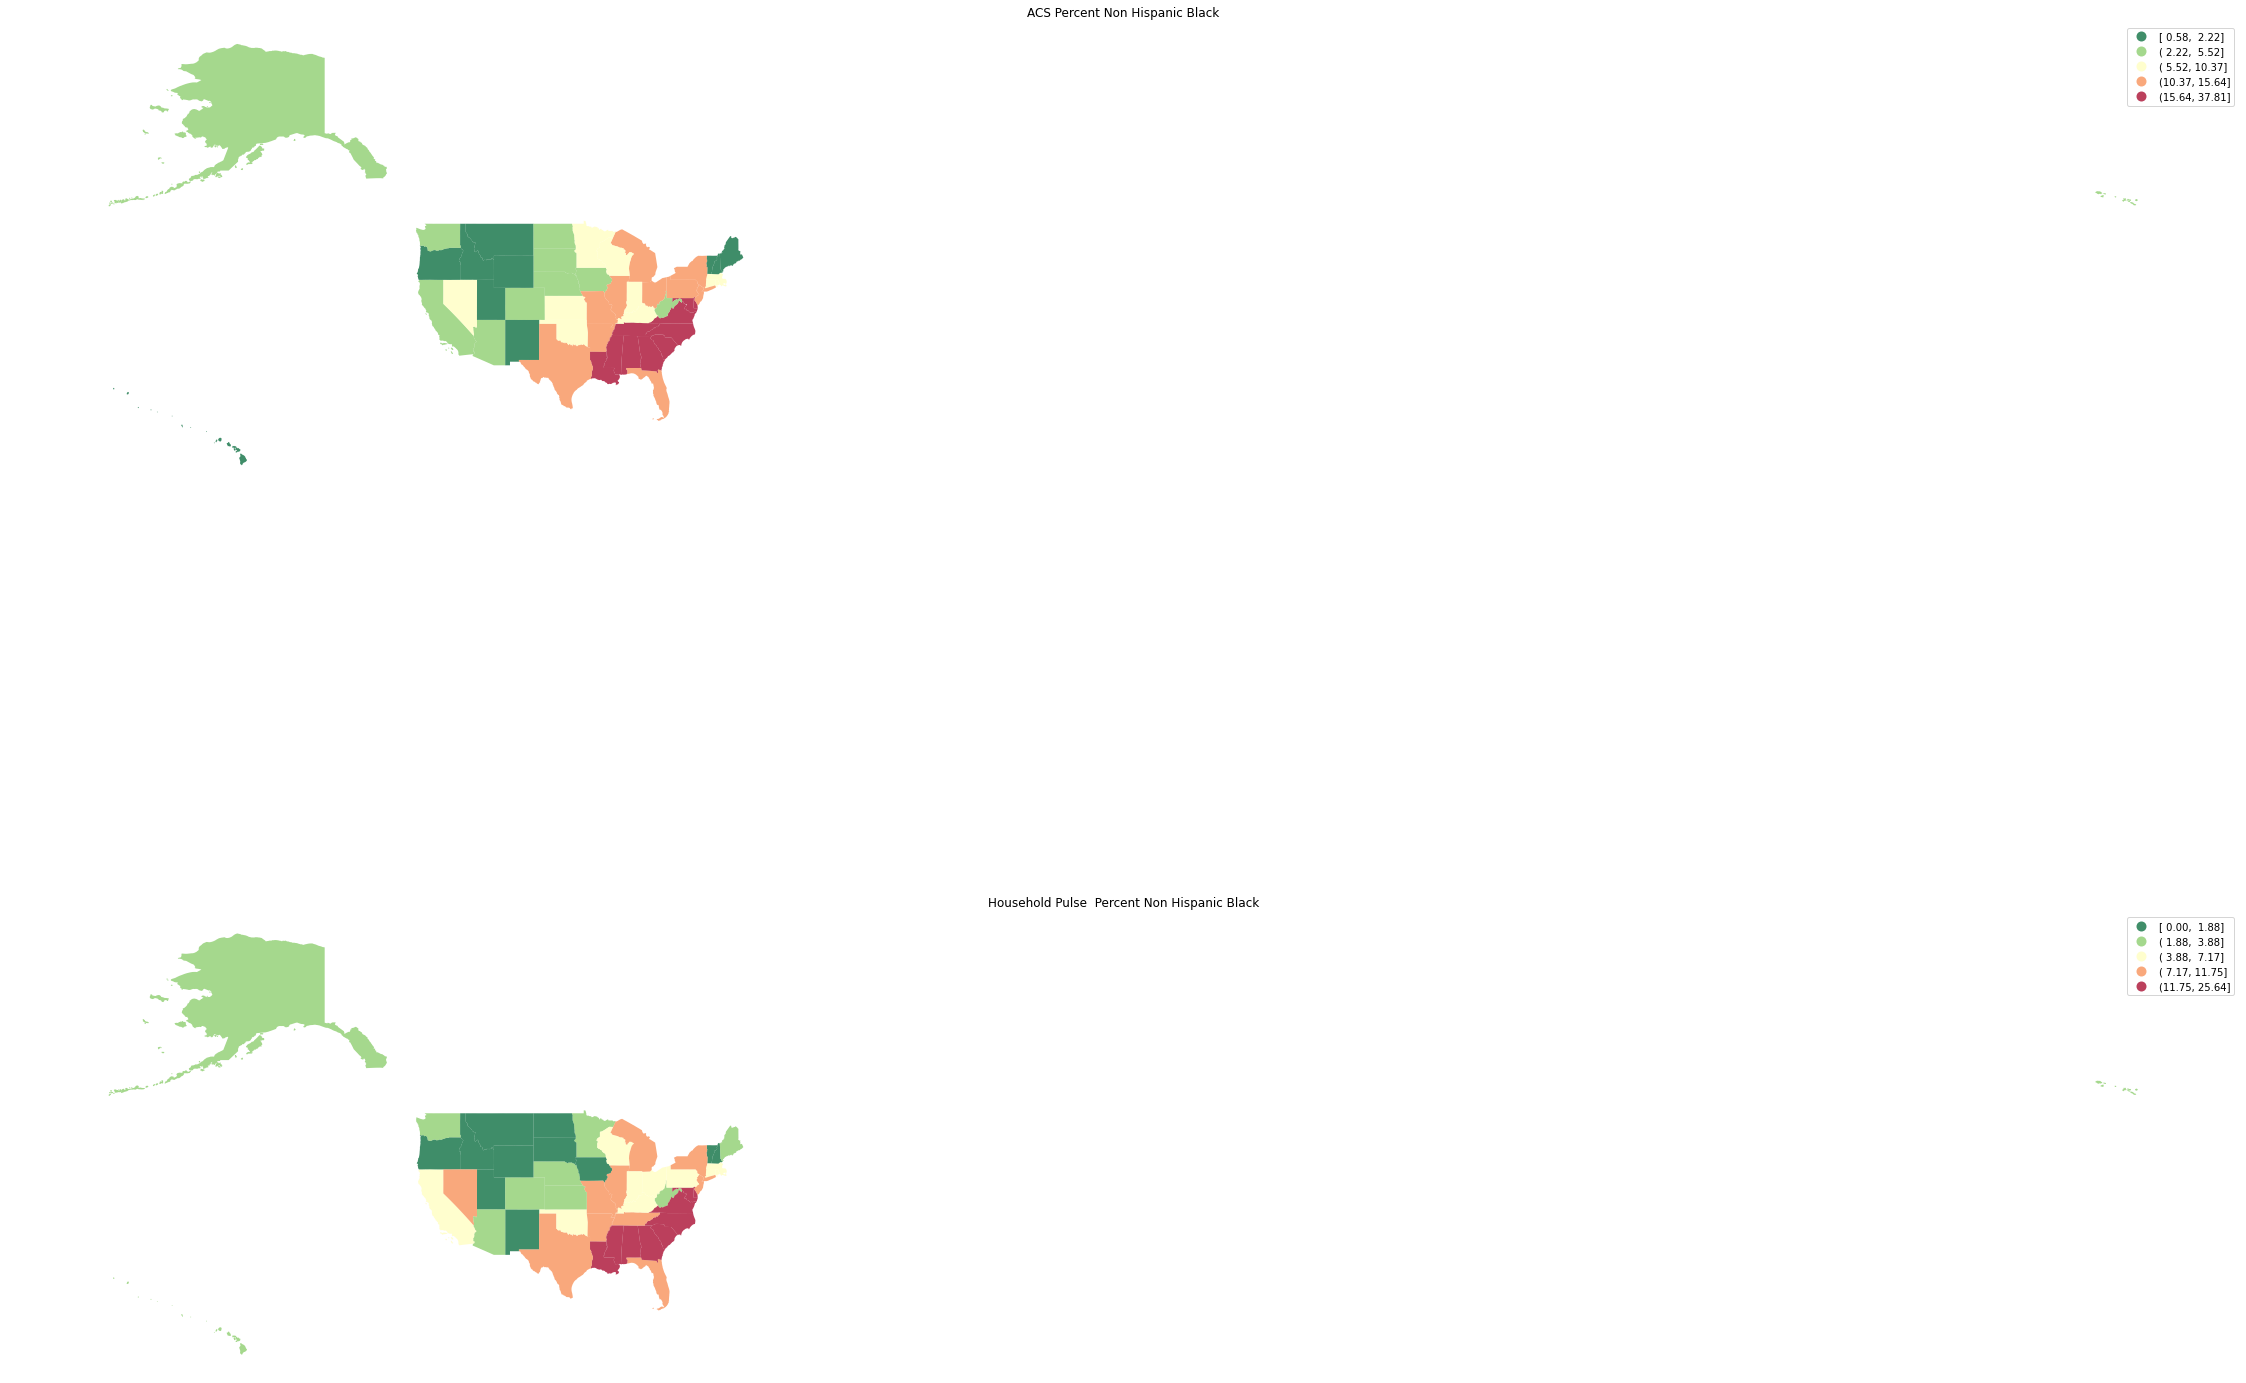

In [57]:

fig, axs = plt.subplots(2, 1, figsize=(40, 30 ))

ax1, ax2 = axs

race_acs.plot(column='Percent Non Hispanic Black', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("ACS Percent Non Hispanic Black")

race_pulse_geo.plot(column='Percent Non Hispanic Black', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Household Pulse  Percent Non Hispanic Black")

Again, like the previous comparison maps, most data falls within the same quintiles, however, there is the state of Iowa is a lower quintile of percent Non-Hispanic Black in the Household Pulse data than in the ACS database. 

Now I will map out  Percent Non Hispanic Asian data for both databases.

Text(0.5, 1.0, 'Household Pulse  Percent Non Hispanic Asian')

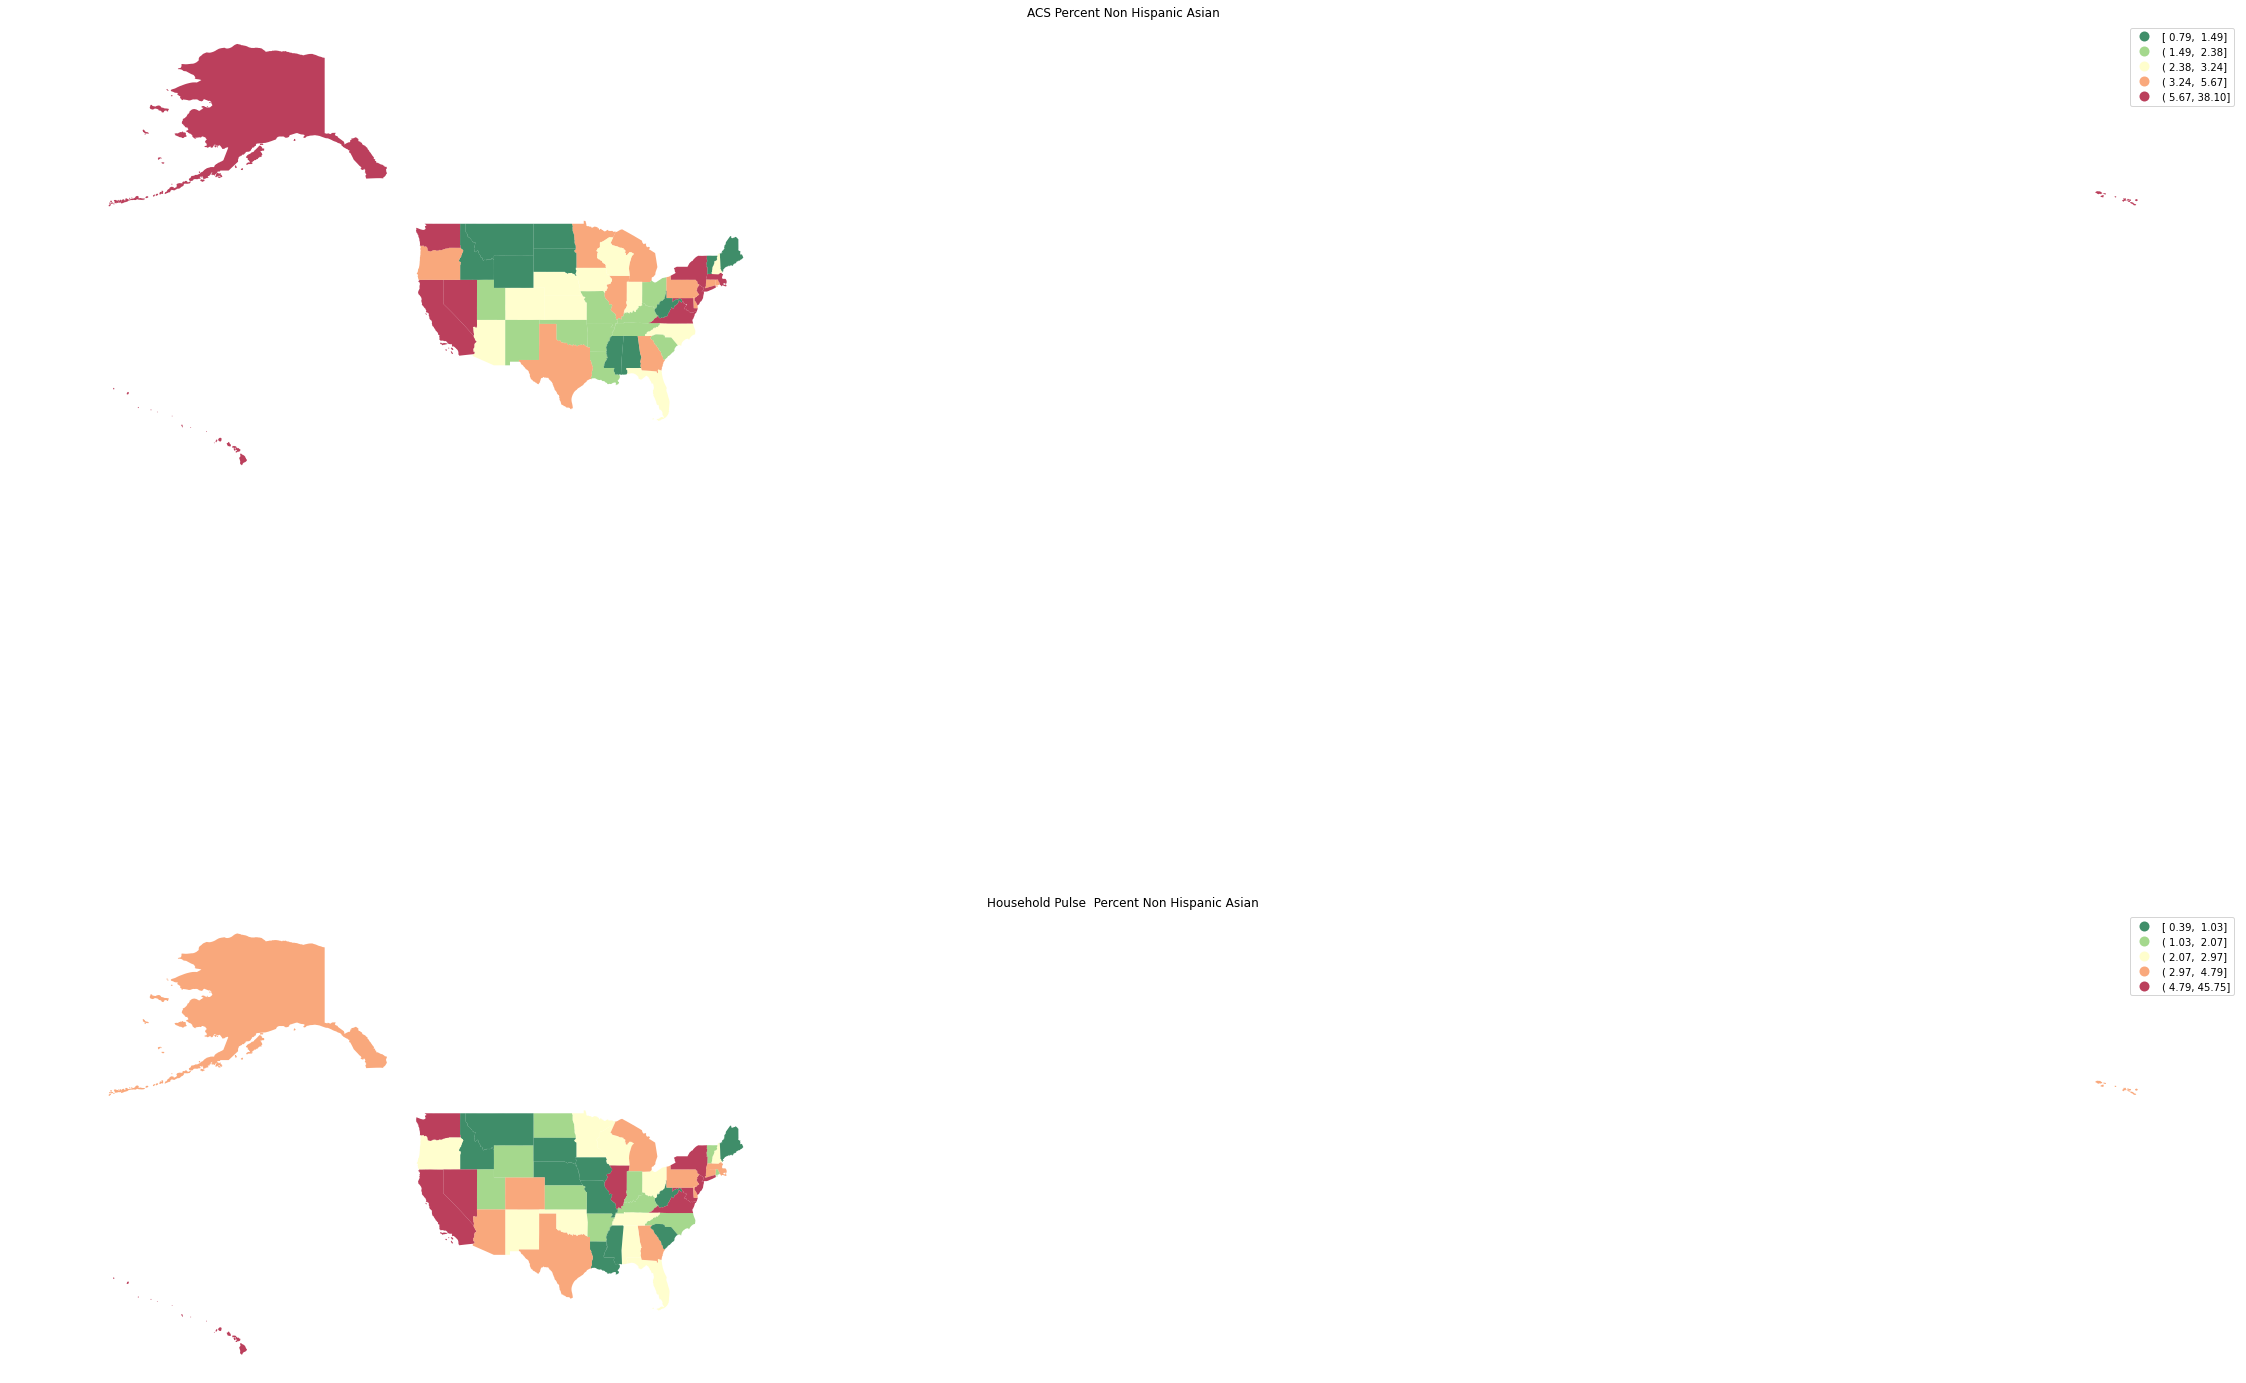

In [58]:

fig, axs = plt.subplots(2, 1, figsize=(40, 30 ))

ax1, ax2 = axs

race_acs.plot(column='Percent Non Hispanic Asian', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("ACS Percent Non Hispanic Asian")

race_pulse_geo.plot(column='Percent Non Hispanic Asian', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Household Pulse  Percent Non Hispanic Asian")

For these maps, I actually see more difference in the quintiles between each database. For example, the state of Alaska is in a higher quintile than in ACS database than in the Household Pulse database.  In contast, the state of Illinois is in a a a lower quintile in the ACS database than in the Household Pulse database. 

I am now going to do a map to compare how many states have higher than 60% Hispanic Population in the ACS database vs. the Household Pulse database.

I tried pluggig in 60 percent first, however, it doesn't appear like any of the states have higher than 60 percent population. I instead did a map for 10%. 

Text(0.5, 1.0, 'Household Pulse- States with Percent Hispanic greater than 10 percent ')

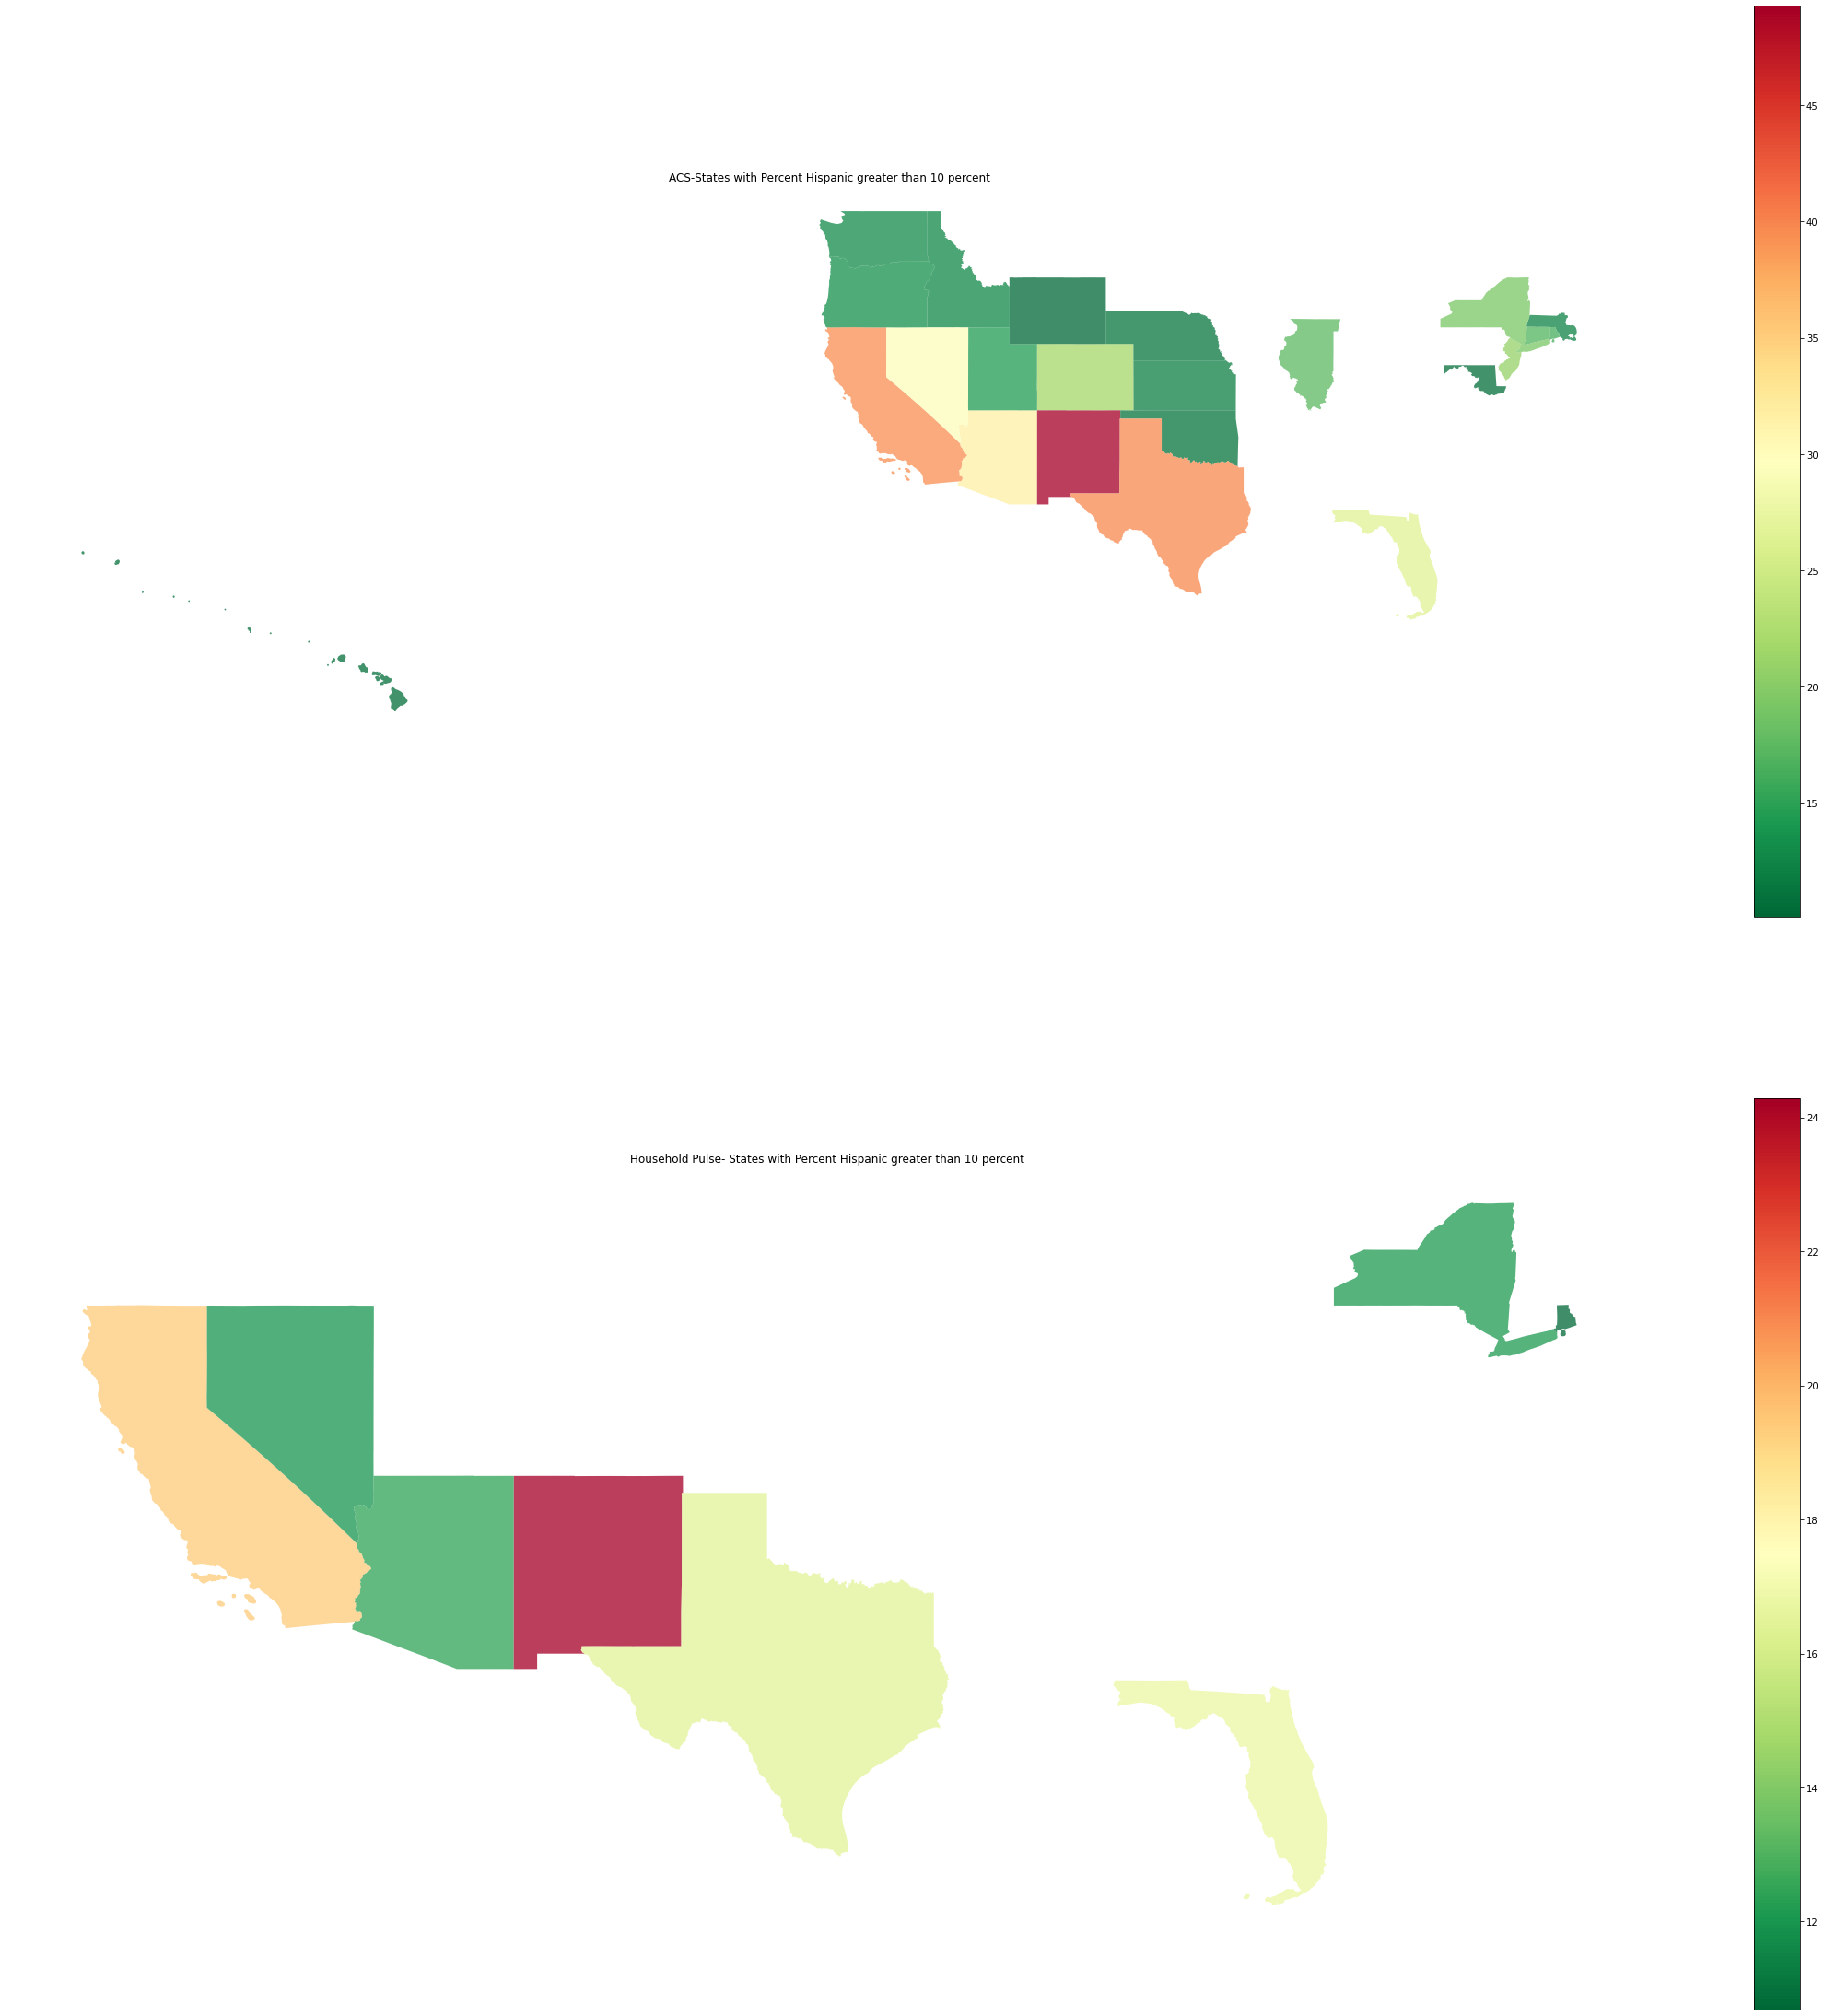

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(40, 40 ))

ax1, ax2 = axs


race_acs[race_acs['Percent Hispanic'] > 10].plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True)


ax1.axis("off")
ax1.set_title("ACS-States with Percent Hispanic greater than 10 percent")

race_pulse_geo[race_pulse_geo['Percent Hispanic'] > 10].plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True)

ax2.axis("off")
ax2.set_title("Household Pulse- States with Percent Hispanic greater than 10 percent ")

Okay, so cleary there the ACS data reports a lot more states with at least 10 percent hispanic population than the Household Pulse! Now I am going to look at difference in higher than 60% reportin Non Hispanic White between the two datasets.

Text(0.5, 1.0, 'Household Pulse -States with Percent Non Hispanic White greater than 60 percent')

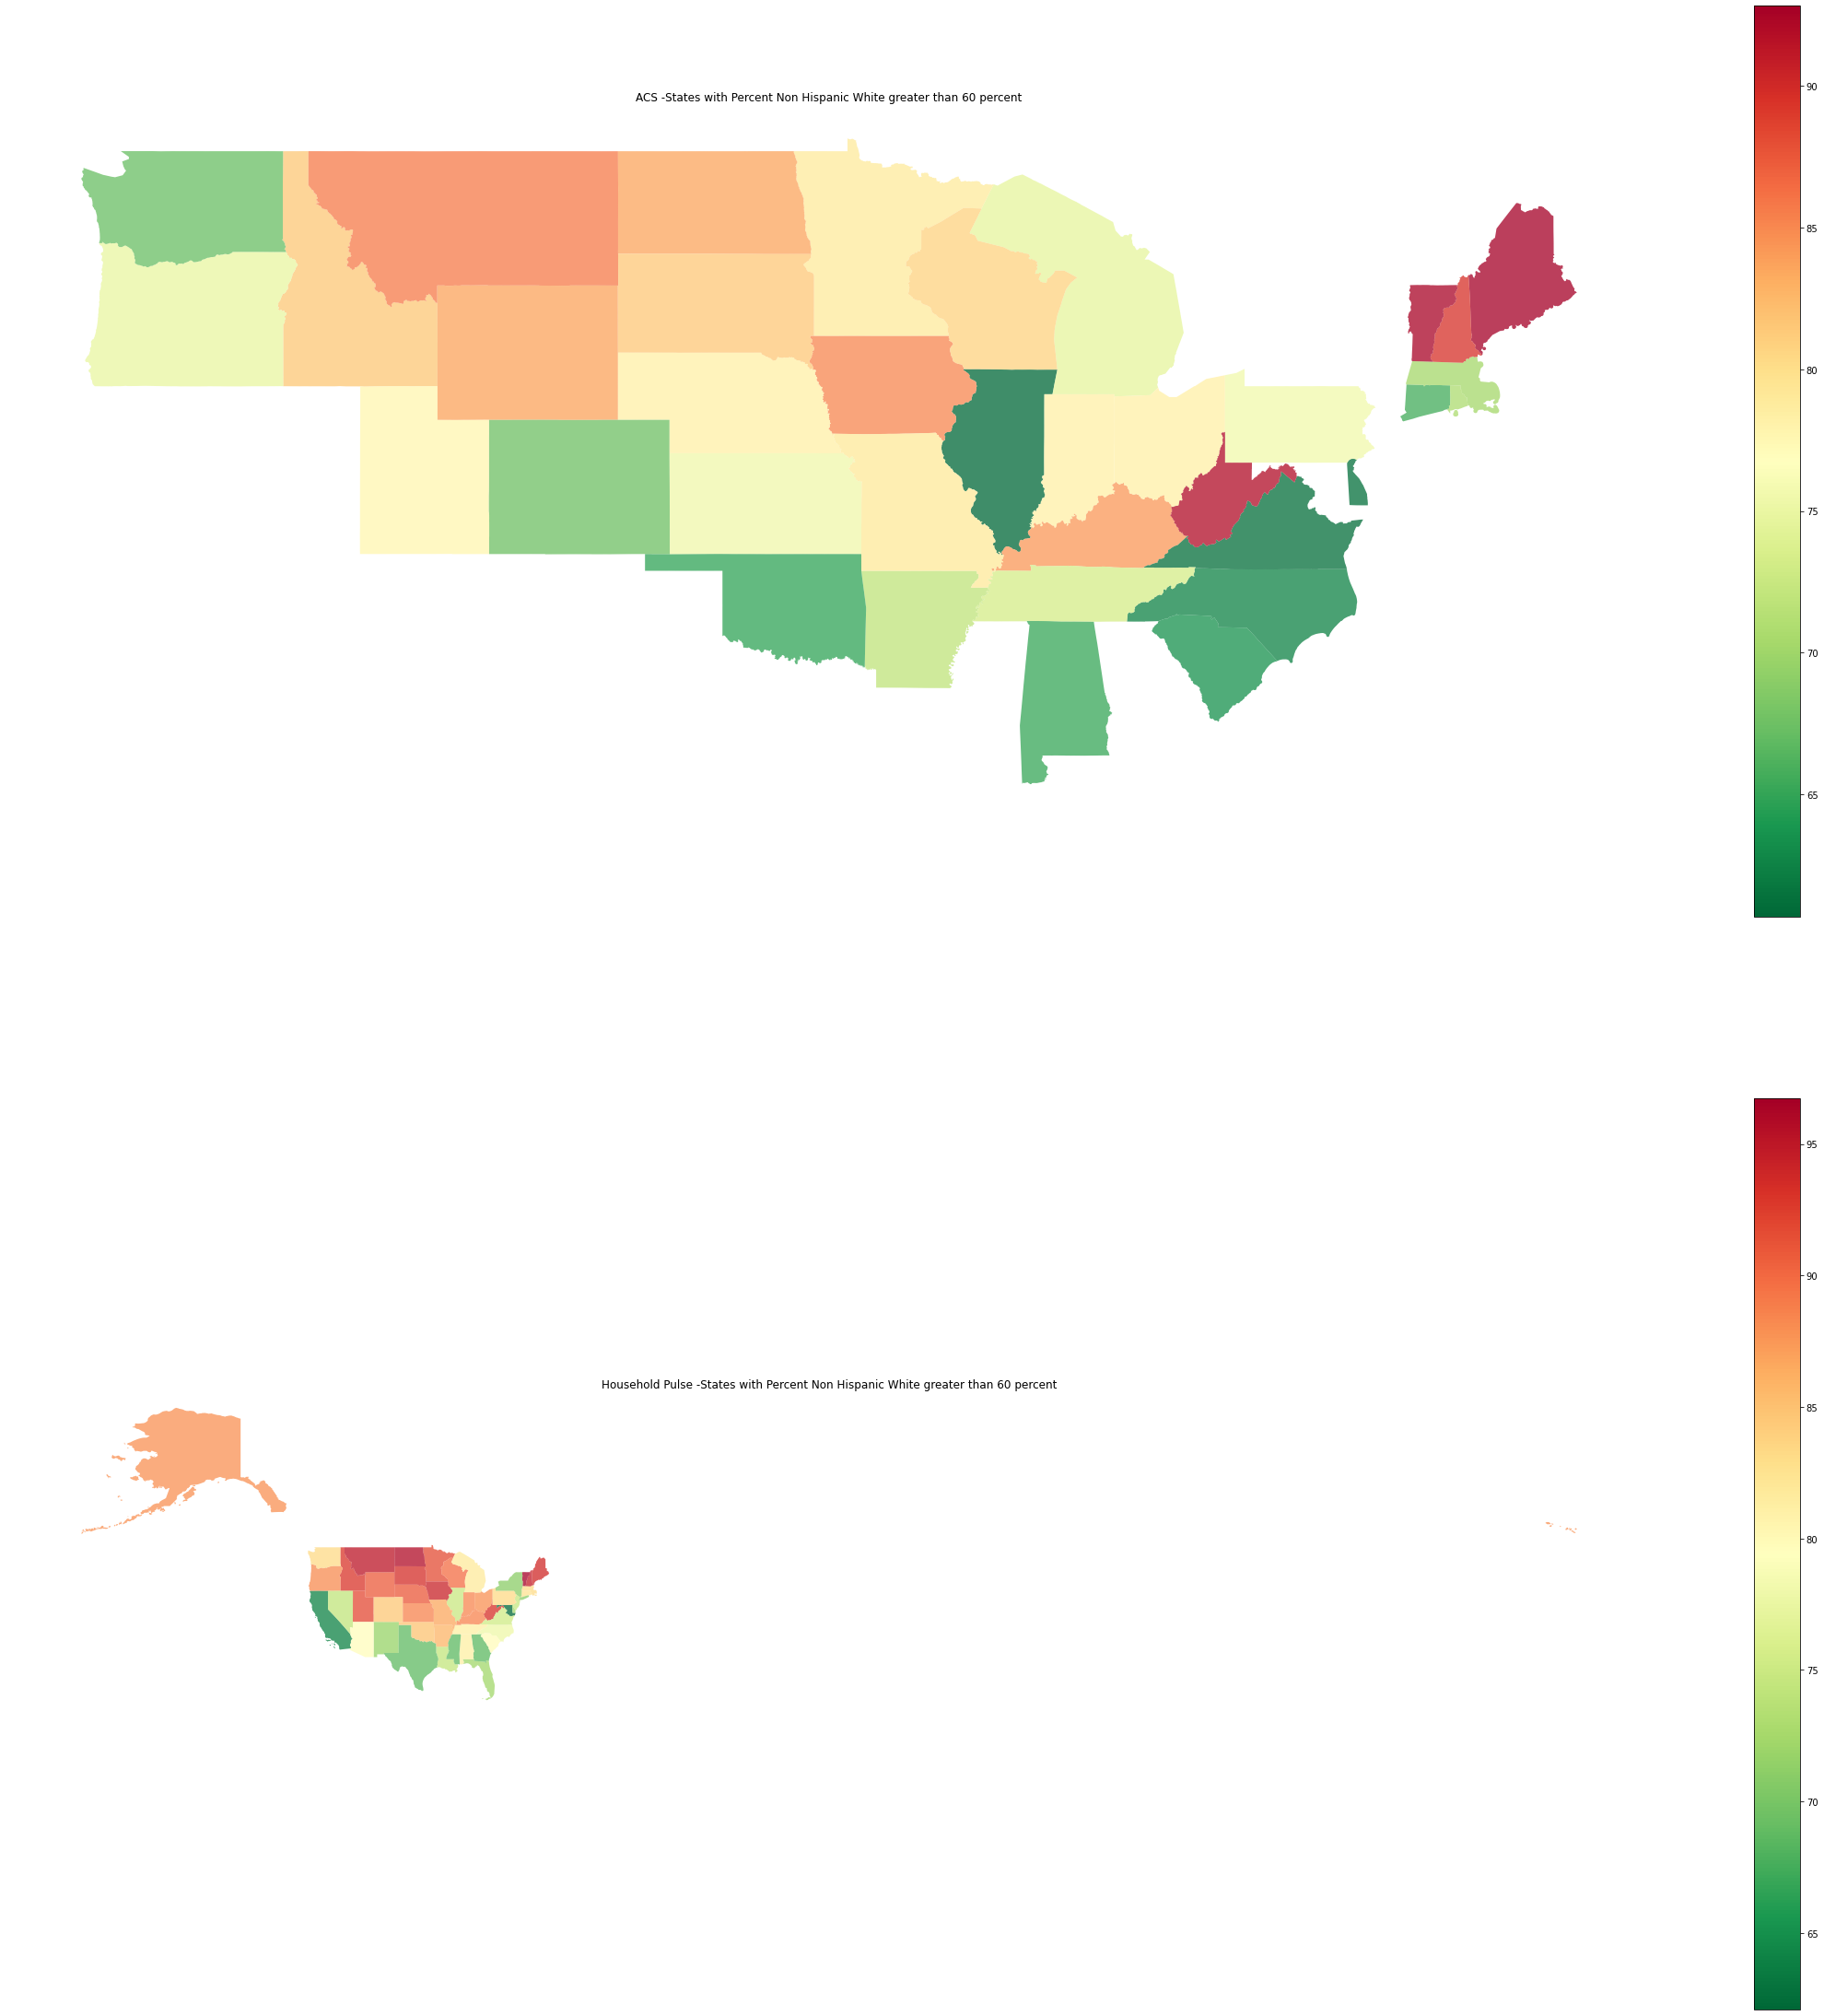

In [61]:
fig, axs = plt.subplots(2, 1, figsize=(40, 40 ))

ax1, ax2 = axs


race_acs[race_acs['Percent Non Hispanic White'] > 60].plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True)


ax1.axis("off")
ax1.set_title("ACS -States with Percent Non Hispanic White greater than 60 percent")

race_pulse_geo[race_pulse_geo['Percent Non Hispanic White'] > 60].plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True)

ax2.axis("off")
ax2.set_title("Household Pulse -States with Percent Non Hispanic White greater than 60 percent")

Well, clearly, the Household Pulse data has an overrepresentation of Non Hispanic White repondents. It seems like all states have a greater than 60 percnt Non Hispanic pouplation in the Household Pulse survey while many states are not included in the ACS data. 

Okay, well. Clearly the data sample form the Household Pulse survey is not representatiove of the actual population. ACS already has some sampling limitations. WE will really have to think about how to deal with limited sample size if we choose to move forward with this data set. m

# The END